# DA3-A3 
## Parker & Co. -1
Peter Szilvasi,
Máté Schieszler 

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

In [2]:
from py_helper_functions import *

In [3]:
# Read in the data offline
original_data = pd.read_csv('cs_bisnode_panel.csv')

In [4]:
# Read in the data online
#original_data = pd.read_csv('https://raw.githubusercontent.com/mateschieszler/DA3-A3/main/cs_bisnode_panel.csv')

In [5]:
# copy original so we don't have to reload it every time (it takes more than 10s)
data = original_data.copy()

In [6]:
# filter out ind2 != 26
# data = data.loc[data['ind2'] == 26] # i would comment this out 
# data['sales'].fillna(0, inplace=True)
data.shape

(287829, 48)

In [7]:
# add all missing year and comp_id combinations -
# originally missing combinations will have NAs in all other columns
data = (
    data.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = data.replace("toReplace", np.nan)  # only way I could define it as NaN

In [8]:
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

# defaults in one year if there are sales in this year but no sales the next year
# Status_in_a_year: data.groupby('comp_id')['status_alive'].shift(-1)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-1) == 0)
).astype(int)

In [9]:
data.loc[data['year'] == 2014].groupby(["status_alive","default"])['comp_id'].count()

status_alive  default
0             0          24060
1             0          19885
              1           2467
Name: comp_id, dtype: int64

In [10]:
# filter for status alive = 1
#data = data.loc[data["status_alive"] == 1]

In [11]:
data["default"].describe()

count    556944.000000
mean          0.066023
std           0.248322
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [12]:
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [13]:
data.shape

(556944, 50)

In [14]:
# with this -> data = working set
# data = data.drop(holdout_set.index)

## Handling Missing Values

In [15]:
# drop year 2015 and 2016
data = data.loc[data['year'] <= 2014]

In [16]:
# look at missing values
data.isna().sum()

year                         0
comp_id                      0
begin                   213540
end                     213540
COGS                    447164
amort                   221485
curr_assets             213665
curr_liab               213665
extra_exp               222292
extra_inc               222292
extra_profit_loss       220962
finished_prod           447884
fixed_assets            213665
inc_bef_tax             220951
intang_assets           213674
inventories             213665
liq_assets              213665
material_exp            221485
net_dom_sales           447164
net_exp_sales           447164
personnel_exp           221485
profit_loss_year        213665
sales                   220951
share_eq                213665
subscribed_cap          213665
tang_assets             215004
wages                   447416
D                       464120
balsheet_flag           213540
balsheet_length         213540
balsheet_notfullyear    213540
founded_year            268057
exit_yea

In [17]:
# Calculate percentage of missing values in each column of the original dataset
original_missing_percentage = (original_data.isnull().sum() / len(original_data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Calculate percentage of missing values in each column of the filtered dataset
filtered_missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine the missing percentage information into a DataFrame for easier comparison
missing_info = pd.DataFrame({
    'Original Data Missing %': original_missing_percentage,
    'Filtered Data Missing %': filtered_missing_percentage
})

missing_info.sort_values(by='Filtered Data Missing %', ascending=False)

,Original Data Missing %,Filtered Data Missing %
D,100.000000,100.000000
finished_prod,93.925213,96.501767
wages,93.752193,96.400931
COGS,93.656998,96.346634
net_exp_sales,93.656998,96.346634
net_dom_sales,93.656998,96.346634
exit_year,86.499276,91.726924
exit_date,80.481466,88.024864
labor_avg,50.909394,75.508489
birth_year,38.848761,68.898776


Would it makes sense to examine all original data as it might have some additinal info which might uncover relations that are not present in our data?

In [18]:
# drop columns with over 12000 missing values
to_drop = ['D','exit_year','wages','finished_prod','COGS','net_exp_sales','net_dom_sales','exit_date']
data = data.drop(to_drop, axis=1)

In [19]:
# drop where industry is empty, itt nem tudom ezt kell e, vagy csak flageljük
# data = data.dropna(subset="ind2")

In [20]:
data

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,labor_avg,status_alive,default
0,2005,1.001034e+06,2005-01-01,2005-12-31,692.592590,7.266667e+03,7.574074e+03,0.000000,0.000000,0.000000,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,1,0
1,2005,1.001541e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2005,1.002029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,2005,1.003200e+06,2005-01-01,2005-12-31,25.925926,7.296296e+02,3.803704e+03,0.000000,4814.814941,4814.814941,...,NaN,5630.0,56.0,3.0,1.0,Central,2003-10-21,NaN,1,0
4,2005,1.004012e+06,2005-01-01,2005-12-31,114.814812,1.648148e+03,3.777778e+03,0.000000,0.000000,0.000000,...,Domestic,3314.0,33.0,2.0,3.0,West,1991-11-24,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464115,2014,4.640446e+11,2014-01-01,2014-12-31,71570.367188,6.486366e+06,2.499133e+06,0.000000,0.000000,0.000000,...,Foreign,3312.0,33.0,2.0,3.0,Central,2008-10-09,2.305556,1,0
464116,2014,4.640568e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
464117,2014,4.640793e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
464118,2014,4.641050e+11,2014-01-01,2014-12-31,1088.888916,5.009630e+04,1.375556e+04,55.555557,0.000000,-55.555557,...,Domestic,5610.0,56.0,3.0,3.0,West,1989-04-28,1.131944,1,0


# Label Engineering

In [21]:
data["default"].describe()

count    464120.000000
mean          0.052168
std           0.222365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [22]:
data["sales"].describe()

count    2.431690e+05
mean     4.860328e+05
std      3.869428e+06
min     -1.472559e+07
25%      4.940741e+03
50%      3.017778e+04
75%      1.091630e+05
max      1.110294e+08
Name: sales, dtype: float64

In [23]:
data["sales"] = np.where(
    data["sales"] < 0, 1, data["sales"]
)  # Replaces negative values in the "sales" column with 1
data = data.assign( # Assigns new columns to the data
    ln_sales=np.where( # Natural logarithm of sales if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"]), 
        (np.where(data["sales"].isna(), np.nan, 0))),  # NaN remain NaN
    sales_mil=data["sales"] / 1000000, # Sales in millions
    sales_mil_log=np.where( # Natural logarithm of sales in millions if sales is larger than 0
        data["sales"] > 0, 
        np.log(data["sales"] / 1000000),
        (np.where(data["sales"].isna(), np.nan, 0)), # NaN remain NaN
    ),
)

In [24]:
data[["sales", "ln_sales", "sales_mil", "sales_mil_log"]].isna().sum()

sales            220951
ln_sales         220951
sales_mil        220951
sales_mil_log    220951
dtype: int64

In [25]:
data["sales"].describe()

count    2.431690e+05
mean     4.861170e+05
std      3.869290e+06
min      0.000000e+00
25%      4.940741e+03
50%      3.017778e+04
75%      1.091630e+05
max      1.110294e+08
Name: sales, dtype: float64

In [26]:
# This difference indicates how the logarithm of sales in millions changes from one period to the next for each company.
# It's often used to capture the rate of change or momentum in a time series.
data["d1_sales_mil_log"] = data["sales_mil_log"] - data.groupby("comp_id")[
    "sales_mil_log"
].shift(1)

In [27]:
# replace w 0 for new firms + add dummy to capture it

# add age of firm
data["age"] = np.where(
    data["year"] - data["founded_year"] < 0, 0, data["year"] - data["founded_year"])

# add dummy for new firms
data["new"] = np.where(
    ((data["age"] <= 1) | (data["balsheet_notfullyear"] == 1)),
    1,
    (np.where(data["age"].isna(), np.nan, 0)))

# replace d1_sales_mil_log with 0 for new firms
data["d1_sales_mil_log"] = np.where(
    data["new"] == 1, 0, np.where(data["new"].isna(), np.nan, data["d1_sales_mil_log"]))

# replace new with 0 for firms with missing d1_sales_mil_log
data["new"] = np.where(data["d1_sales_mil_log"].isna(), 1, data["new"])

# replace d1_sales_mil_log with 0 for firms with missing d1_sales_mil_log
data["d1_sales_mil_log"] = np.where(
    data["d1_sales_mil_log"].isna(), 0, data["d1_sales_mil_log"])

# Feature Engineering

In [28]:
#######################
### Decide here for cross section or panel
#######################
# look at cross section
#data=data.query('year==2014 & status_alive == 1')
# look at firms below 10m euro revenues and above 1000 euros
#data=data.query('sales_mil<=10 & sales_mil>=0.001')
data=data.query('sales_mil<=10')

In [29]:
data.shape

(240984, 48)

In [30]:
data['default'].describe()

count    240984.000000
mean          0.099886
std           0.299849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [31]:
data.isna().sum()

year                         0
comp_id                      0
begin                        0
end                          0
amort                      449
curr_assets                125
curr_liab                  125
extra_exp                 1339
extra_inc                 1339
extra_profit_loss            9
fixed_assets               125
inc_bef_tax                  0
intang_assets              132
inventories                125
liq_assets                 125
material_exp               449
personnel_exp              449
profit_loss_year           125
sales                        0
share_eq                   125
subscribed_cap             125
tang_assets               1462
balsheet_flag                0
balsheet_length              0
balsheet_notfullyear         0
founded_year             51225
ceo_count                51196
foreign                  51196
female                   51196
birth_year               99437
inoffice_days            51196
gender                   51196
origin  

In [32]:
data['ind2_cat']=data['ind2'].copy() # lets create this but skip the recategorization for now
data['ind2_cat']=np.where(data['ind2']>56,60,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2']<26,20,data['ind2_cat'])
data['ind2_cat']=np.where((data['ind2']<55)&(data['ind2']>35),40,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2']==31,30,data['ind2_cat'])
data['ind2_cat']=np.where(data['ind2'].isna(),99,data['ind2_cat'])

In [33]:
data.groupby('ind2_cat').count()['comp_id']

ind2_cat
20.0       567
26.0     12346
27.0      7435
28.0     21738
29.0      3179
30.0      2052
32.0      1608
33.0     18242
35.0         4
40.0      2318
55.0     28332
56.0    139274
60.0      2917
99.0       972
Name: comp_id, dtype: int64

In [34]:
# Firm characteristics
data["age2"] = data["age"] ** 2
data["foreign_management"] = np.where(
    data["foreign"] >= 0.5, 1, np.where(data["foreign"].isna(), np.nan, 0)
)
data["gender_m"] = data["gender"].astype("category")
data["m_region_loc"] = data["region_m"].astype("category")

In [35]:
###########################################################
# look at more financial variables, create ratios
###########################################################

# assets can't be negative. Change them to 0 and add a flag.
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"] < 0)
        | (data["curr_assets"] < 0)
        | (data["fixed_assets"] < 0)
    ),
    1,
    0,
)
data["flag_asset_problem"] = np.where(
    (
        (data["intang_assets"].isna())
        | (data["curr_assets"].isna())
        | (data["fixed_assets"].isna())
    ),
    np.nan,
    data["flag_asset_problem"],
)
data.groupby("flag_asset_problem").count()["comp_id"]

flag_asset_problem
0.0    240652
1.0       200
Name: comp_id, dtype: int64

In [36]:
data["intang_assets"] = np.where(data["intang_assets"] < 0, 0, data["intang_assets"])
data["curr_assets"] = np.where(data["curr_assets"] < 0, 0, data["curr_assets"])
data["fixed_assets"] = np.where(data["fixed_assets"] < 0, 0, data["fixed_assets"])

In [37]:
# generate total assets
data["total_assets_bs"] = (
    data["intang_assets"] + data["curr_assets"] + data["fixed_assets"]
)
data["total_assets_bs"].describe()

count    2.408520e+05
mean     3.710608e+05
std      2.779192e+07
min      0.000000e+00
25%      4.803704e+03
50%      1.932963e+04
75%      8.016297e+04
max      1.032471e+10
Name: total_assets_bs, dtype: float64

In [38]:
pl_names = [
    "extra_exp",
    "extra_inc",
    "extra_profit_loss",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "profit_loss_year",
    "personnel_exp",
]
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

In [39]:
# divide all pl_names elements by sales and create new column for it
data[[col + "_pl" for col in pl_names]] = data[pl_names].div(
    data["sales"], axis="index"
)

In [40]:
# divide all bs_names elements by total_assets_bs and create new column for it
data[[col + "_bs" for col in bs_names]] = (
    data[bs_names]
    .div(data["total_assets_bs"], axis="index")
    .replace((np.inf, -np.inf, np.nan), (0, 0, 0))
)
# get Nan values where total_assets_bs is NaN
for col in bs_names:
    data[col + "_bs"] = np.where(
        data["total_assets_bs"].isna(), np.nan, data[col + "_bs"]
    )

In [41]:
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]
# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

empty_columns = holdout_set.columns[holdout_set.isna().any()].tolist()
data[empty_columns].isna().sum()[data[empty_columns].isna().sum() > 0]


holdout_set.isna().sum()[holdout_set.isna().sum() > 0]

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


amort                   2
material_exp            2
personnel_exp           2
founded_year           31
ceo_count              31
foreign                31
female                 31
birth_year            114
inoffice_days          31
gender                 31
origin                 31
region_m                2
labor_avg             312
age                    31
age2                   31
foreign_management     31
gender_m               31
m_region_loc            2
material_exp_pl         2
personnel_exp_pl        2
dtype: int64

In [42]:
# List of numerical columns
numerical_cols = ["amort", "material_exp", "personnel_exp", "founded_year", "ceo_count", "birth_year",
                  "inoffice_days", "age","age2", "material_exp_pl", "personnel_exp_pl","profit_loss_year_pl"]

# List of binary columns
binary_cols_and_categorical = ["foreign", "female", "foreign_management","gender","region_m","gender_m","m_region_loc","origin"]

# List of new flags
new_flags = []

# Impute median for numerical columns
for col in numerical_cols:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    data[col + '_flag'] = np.where(data[col].isna(), 1, 0)
    new_flags.append(col + '_flag')

# Impute mode for binary columns
for col in binary_cols_and_categorical:
    mode_val = data[col].mode().iloc[0]  # In case there are multiple modes
    data[col].fillna(mode_val, inplace=True)
    data[col + '_flag'] = np.where(data[col].isna(), 1, 0)
    new_flags.append(col + '_flag')


X3_flags = ["total_assets_bs","liq_assets_bs","curr_assets_bs","subscribed_cap_bs","intang_assets_bs","extra_exp_pl","extra_inc_pl","inventories_pl"]

for col in X3_flags:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    data[col + '_flag'] = np.where(data[col].isna(), 1, 0)

In [43]:
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]
# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

empty_columns = holdout_set.columns[holdout_set.isna().any()].tolist()
data[empty_columns].isna().sum()[data[empty_columns].isna().sum() > 0]


holdout_set.isna().sum()[holdout_set.isna().sum() > 0]

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


labor_avg    312
dtype: int64

In [44]:
########################################################################
# creating flags, and winsorizing tails
########################################################################

# Variables that represent accounting items that cannot be negative (e.g. materials)
zero = [
    "extra_exp_pl",
    "extra_inc_pl",
    "inventories_pl",
    "material_exp_pl",
    "personnel_exp_pl",
    "curr_liab_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
]

data[[col + "_flag_high" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] > 1).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] > 1, 1, data[zero])
)
data[[col + "_flag_error" for col in zero]] = np.where(
    data[zero].isna(), np.nan, (data[zero] < 0).astype(int)
)
data[[col for col in zero]] = np.where(
    data[zero].isna(), np.nan, np.where(data[zero] < 0, 0, data[zero])
)

In [45]:
# for vars that could be any, but are mostly between -1 and 1
anyof = ["extra_profit_loss_pl", "inc_bef_tax_pl", "profit_loss_year_pl", "share_eq_bs"]

data[[col + "_flag_low" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] < -1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] < -1), -1, data[anyof])
)
data[[col + "_flag_high" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] > 1).astype(int)
)
data[[col for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, np.where((data[anyof] > 1), 1, data[anyof])
)
data[[col + "_flag_zero" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, (data[anyof] == 0).astype(int)
)
data[[col + "_quad" for col in anyof]] = np.where(
    data[anyof].isna(), np.nan, data[anyof] ** 2
)

In [46]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if "flag" in col]
data = data.drop(
    data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1
)

In [47]:
########################################################################
# additional
# including some imputation
########################################################################

# CEO age
data["ceo_age"] = data["year"] - data["birth_year"]
data = data.assign(
    flag_low_ceo_age=(data["ceo_age"] < 25).astype(int),
    flag_high_ceo_age=(data["ceo_age"] > 75).astype(int),
    flag_miss_ceo_age=(data["ceo_age"].isna()).astype(int),
)


data["ceo_age"] = np.where(data["ceo_age"] < 25, 25, data["ceo_age"])
data["ceo_age"] = np.where(data["ceo_age"] > 75, 75, data["ceo_age"])
data["ceo_age"] = np.where(
    data["ceo_age"].isna(), data["ceo_age"].mean(), data["ceo_age"]
)
data["ceo_young"] = (data["ceo_age"] < 40).astype(int)

In [48]:
# number emp, very noisy measure
data["labor_avg_mod"] = np.where(
    data["labor_avg"].isna(), data["labor_avg"].mean(), data["labor_avg"]
)
data["flag_miss_labor_avg"] = (data["labor_avg"].isna()).astype(int)

In [49]:
data = data.drop(["labor_avg"], axis=1) # ez Gáboréban benne van, de nem tudom miért, hagyjuk bent

In [50]:
# create category type variables
data["urban_m"] = data["urban_m"].astype("category")
data['ind2_cat'] = data['ind2_cat'].astype("category")
data["default_f"] = data["default"].astype("category")
data["default_f"] = data["default_f"].cat.rename_categories(["no_default", "default"])

In [51]:
########################################################################
# sales
########################################################################
data["sales_mil_log_sq"] = data["sales_mil_log"] ** 2

In [52]:
"""(
    ggplot(data, aes(x="sales_mil_log", y="default"))
    + geom_point(color=color[0])
    + geom_smooth(method = 'lm',color = 'red')
    + geom_smooth(method="lm", formula="y ~ x + I(x**2)", color=color[1], se=False)
    + geom_smooth(method="loess", color=color[2], se=False, size=1.5, span=0.9)
    + labs(x="sales_mil_log", y="default")
    + theme_bw()
)"""

'(\n    ggplot(data, aes(x="sales_mil_log", y="default"))\n    + geom_point(color=color[0])\n    + geom_smooth(method = \'lm\',color = \'red\')\n    + geom_smooth(method="lm", formula="y ~ x + I(x**2)", color=color[1], se=False)\n    + geom_smooth(method="loess", color=color[2], se=False, size=1.5, span=0.9)\n    + labs(x="sales_mil_log", y="default")\n    + theme_bw()\n)'

In [53]:
# Linear regressions
ols_s = smf.ols("default ~ sales_mil_log + sales_mil_log_sq", data=data).fit()
print(ols_s.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:50:37   Log-Likelihood:                -41536.
No. Observations:              240984   AIC:                         8.308e+04
Df Residuals:                  240981   BIC:                         8.311e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0122      0.001  

In [54]:
########################################################################
# sales change
########################################################################
# Note: graphs not in book

# lowess
data['d1_sales_mil_log'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

count    240984.000000
mean          0.042207
std           1.223182
min         -13.815511
1%           -4.198157
5%           -0.899703
50%           0.000000
95%           0.935717
99%           5.635086
max          14.634809
Name: d1_sales_mil_log, dtype: float64

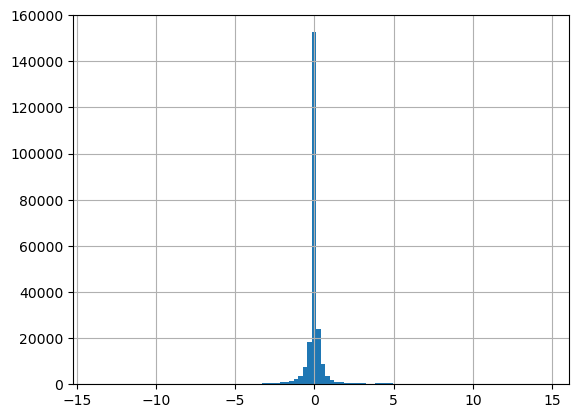

In [55]:
data['d1_sales_mil_log'].hist(bins=100)
plt.show()

In [56]:
"""(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))
    + theme_bw()
)"""

'(\n    ggplot(data, aes(x="d1_sales_mil_log", y="default"))\n    + geom_point(color=color[1])\n    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)\n    + labs(x="Growth rate (Diff of ln sales)", y="default")\n    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))\n    + theme_bw()\n)'

In [57]:
# generate variables ---------------------------------------------------

data["flag_low_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] < -1.5, 1, 0)
data["flag_high_d1_sales_mil_log"] = np.where(data["d1_sales_mil_log"] > 1.5, 1, 0)
data["d1_sales_mil_log_mod"] = np.where(
    data["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(data["d1_sales_mil_log"] > 1.5, 1.5, data["d1_sales_mil_log"]),
)
data["d1_sales_mil_log_mod_sq"] = data["d1_sales_mil_log_mod"] ** 2

In [58]:
"""(
    ggplot(data, aes(x="d1_sales_mil_log_mod", y="default"))
    + geom_point(color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))
    + theme_bw()
)"""

'(\n    ggplot(data, aes(x="d1_sales_mil_log_mod", y="default"))\n    + geom_point(color=color[1])\n    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)\n    + labs(x="Growth rate (Diff of ln sales)", y="default")\n    + scale_x_continuous(limits=(-6, 10), breaks=seq(-5, 10, by=5))\n    + theme_bw()\n)'

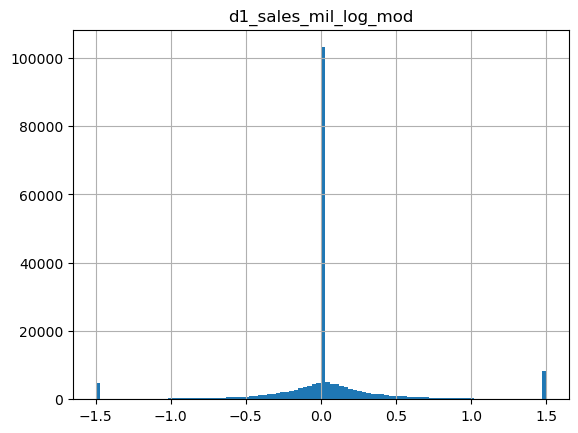

In [59]:
data.loc[data['default']== 0].hist("d1_sales_mil_log_mod",bins=100)
plt.show()

In [60]:
# no more imputation, drop obs if key vars missing
# data = data.dropna(subset=["liq_assets_bs", "foreign", "ind"])

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is

In [61]:
# drop missing
# data = data.dropna(subset=["age", "foreign", "material_exp_pl", "m_region_loc"])
data["age"].describe()

# ha ezt belerakjuk akkor elcsúszik a holdout set megvizsgáltam úgy hogy előtte beillesztettem a holdout set-es részt és utána is


count    240984.000000
mean          8.393781
std           5.615438
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          63.000000
Name: age, dtype: float64

In [62]:
data[["age", "foreign", "material_exp_pl", "m_region_loc", "liq_assets_bs", "foreign", "ind"]].isna().sum()

age                   0
foreign               0
material_exp_pl       0
m_region_loc          0
liq_assets_bs         0
foreign               0
ind                8409
dtype: int64

In [63]:
# drop unused factor levels
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()

In [64]:
"""(
    ggplot(data, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(size=0.1, color=color[1])
    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + scale_x_continuous(limits=(-1.5, 1.5), breaks=seq(-1.5, 1.5, by=0.5))
    + theme_bw()
)"""

'(\n    ggplot(data, aes(x="d1_sales_mil_log", y="default"))\n    + geom_point(size=0.1, color=color[1])\n    + geom_smooth(method="loess", color=color[0], se=False, size=1.5, span=0.9)\n    + labs(x="Growth rate (Diff of ln sales)", y="default")\n    + scale_x_continuous(limits=(-1.5, 1.5), breaks=seq(-1.5, 1.5, by=0.5))\n    + theme_bw()\n)'

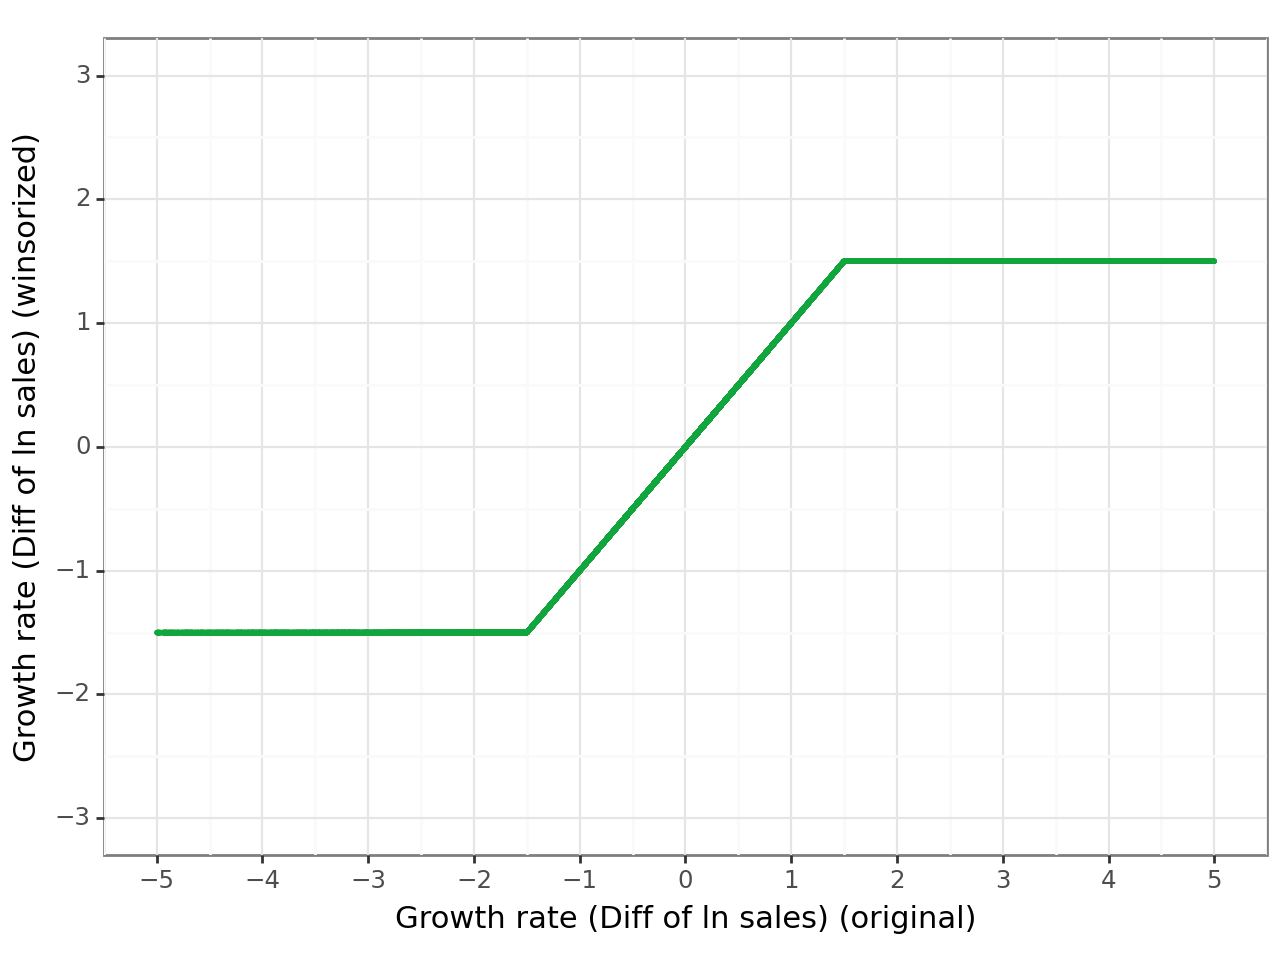

<Figure Size: (640 x 480)>

In [65]:
(
    ggplot(data, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=0.1, color=color[1])
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + scale_x_continuous(limits=(-5, 5), breaks=seq(-5, 5, by=1))
    + scale_y_continuous(limits=(-3, 3), breaks=seq(-3, 3, by=1))
    + theme_bw()
)

In [66]:
# look at firms below 10m euro revenues and above 1000 euros (SME filtering)
#data = data.loc[(data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# EDA

In [67]:
data[['year','comp_id']].groupby('year').nunique()

,comp_id
year,
2005,18630
2006,19324
2007,20978
2008,22502
2009,24319
2010,25596
2011,26845
2012,27221
2013,27770


In [68]:
data[['year','default','status_alive']].groupby('year').sum()

,default,status_alive
year,,
2005,1895,16631
2006,1531,16889
2007,1991,18361
2008,1963,19664
2009,2645,21401
2010,3002,22098
2011,2985,22590
2012,2936,22620
2013,2683,22382


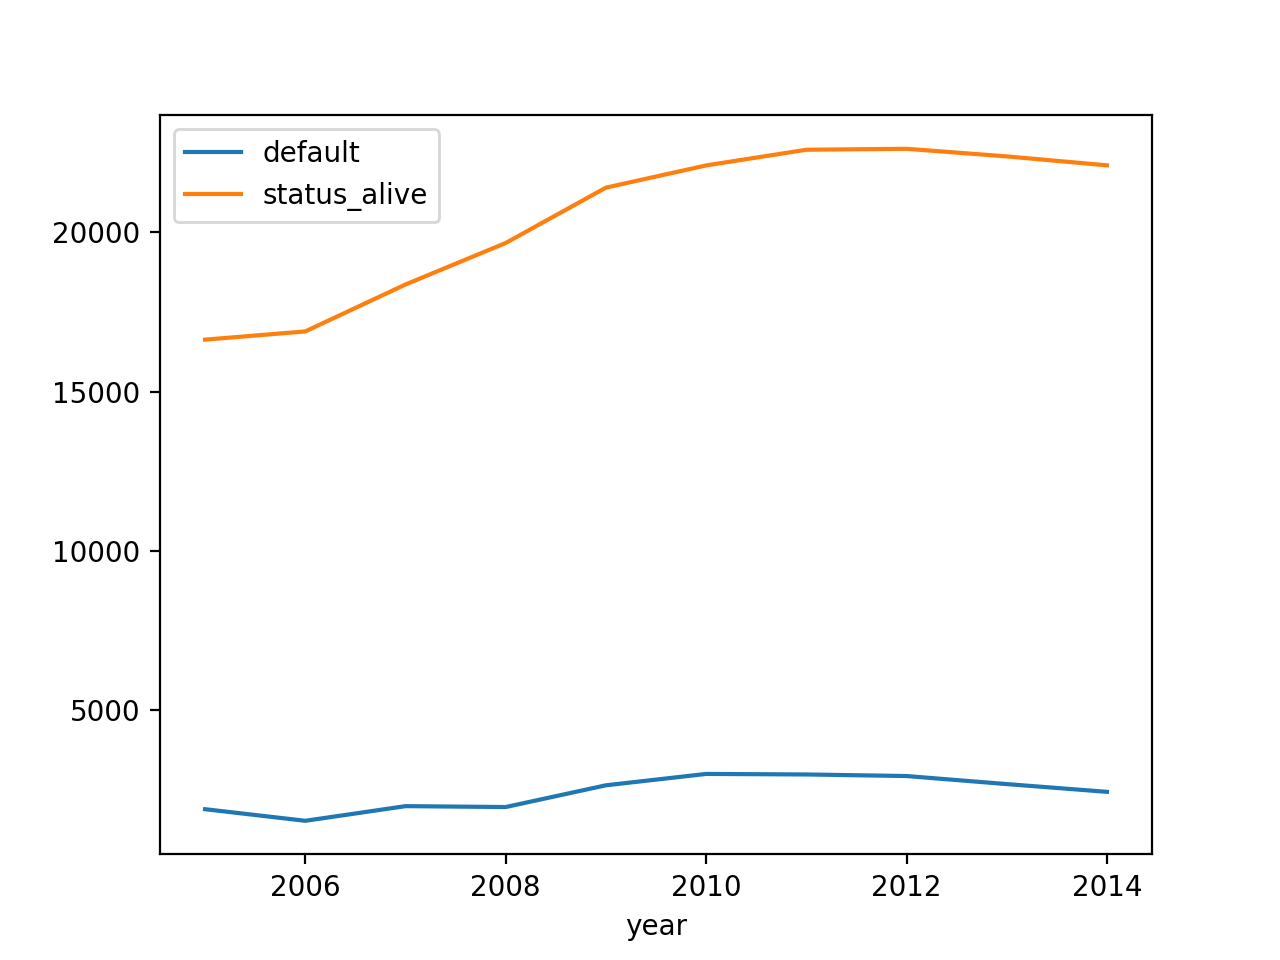

In [69]:
data[['year','default','status_alive']].groupby('year').sum().plot(kind='line')
plt.show()

In [70]:
data.default.mean()

0.09988629950536135

# Construction of the holdout set

We are only interested in predicting default for ‘ind2 == 26’, which is the selected industry, and the
firm is a small or medium enterprise (SME). Thus, yearly sales in 2014 was between 1000 EUR and 10
million EUR.

Existed in 2014 (sales > 0), but did not exists in 2015 (sales is 0 or missing)

If you do the sample design properly:
- you have an overall of 1037 firms.
- 56 firms defaulted
- 981 stayed alive. 
- The average sales of the firms is 0.4902 million EUR, with the minimum of 0.00107 million
EUR and 9.57648 million EUR.

In [71]:
# Creating the holdout set
holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0



# Kérdések
- jó e az a szűrés hogy ind2 csak 26, nem lehet se empty se semmi más
- 1 évet nézünk vagy többet?
    - ha többet nézünk akkor rakhatnánk bele olyan változókat amik valamiféle trendeket, változásokat vagy több éven keresztüli átlagokat mutatnak
    - ha több évet nézünk akkor mi lesz azokkal a cégekkel, amik defaultolnak? bentmaradnak végig a táblázatban nan adatokkal - erre kéne egy szűrés, hogy kiessenek, de nem tudom melyik az a lépés ahol ennek ki kell jöbbie!

- SME sales-t vizsgálni
- CEU age 75? sokallom
    - itt olyan gondolatom van hogy majd a modellek fine tuneolálásnál az ilyen apró dolgok megváltoztatásával tudjuk egyedivé tenni a modellt
- Milyen hatása van az stack unstacknek? igazából csinál egy csomó NA sort, de ez alapján nem szabad megítélni h melyik sorban mennyi a hiányzó érték, inkább a default+aliveval lehetne talán - az se biztos, hogy jó
- a két dropos részt be kell raknunk valahova mert szerintem a nanok amiatt maradnak bent, de mi van ha a holdoutban van nan? akkor lehet predictálni, ahhoz nem kell h meglegyen az értékelk??



# Végig Gáborén favágással, nézzük meg mi jön ki minden finomhagolás nélkül!
nem sikerült, kurvasok hibára futottam, megpróbálom péterét

In [72]:
import os
import pandas as pd
import numpy as np
import sys
import patsy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import sklearn.metrics as metrics
from sklearn.metrics import brier_score_loss, roc_curve, auc, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Define helper functions

In [73]:
# Péter
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
def create_coef_matrix(X, model):
    coef_matrix = pd.concat(
        [pd.DataFrame(X.columns),pd.DataFrame(model.coef_.flatten())], axis = 1
    )
    coef_matrix.columns = ['variable', 'coefficient']
    coef_matrix.iloc[-1] = ['Intercept', model.intercept_.flatten()[0]]
    return coef_matrix

def cv_summary(lambdas, C_values, model):
    d = {'lambdas': lambdas, 'C_values': C_values, 'mean_cv_score': model.scores_[1].mean(axis = 0)}
    return(pd.DataFrame(data=d))

def create_roc_plot(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    all_coords = pd.DataFrame({
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
    })
    
    plot = ggplot(all_coords, aes(x = 'fpr', y = 'tpr')) \
        + geom_line(color=color[0], size = 0.7) \
        + geom_area(position = 'identity', fill = 'mediumaquamarine', alpha = 0.3) \
        + xlab("False Positive Rate (1-Specifity)") \
        + ylab("True Positive Rate (Sensitivity)") \
        + geom_abline(intercept = 0, slope = 1,  linetype = "dotted", color = "black") \
        + scale_y_continuous(limits = (0, 1), breaks = seq(0, 1, .1), expand = (0, 0.01)) \
        + scale_x_continuous(limits = (0, 1), breaks = seq(0, 1, .1), expand = (0.01, 0)) \
        + theme_bw()
    return(plot)

def sigmoid_array(x):
    return(1 / (1 + np.exp(-x)))

def generate_fold_prediction(model, X, fold, param_index):
    fold_coef = model.coefs_paths_[1][fold,param_index,:]
    return(sigmoid_array(np.dot(X, np.transpose(fold_coef)[:-1]) +  np.transpose(fold_coef)[-1]))

def create_loss_plot(all_coords, optimal_threshold, curr_exp_loss):
    all_coords_copy = all_coords.copy()
    all_coords_copy['loss'] = (all_coords_copy.false_pos*FP + all_coords_copy.false_neg*FN)/all_coords_copy.n
    
    t = optimal_threshold
    l = curr_exp_loss
    
    plot = ggplot(all_coords_copy, aes(x = 'thresholds', y = 'loss')) + \
        geom_line(color=color[0], size=0.7) + \
        scale_x_continuous(breaks = seq(0, 1.1, by = 0.1)) + \
        coord_cartesian(xlim=(0,1))+ \
        geom_vline(xintercept = t , color = color[0] ) + \
        annotate(geom = "text", x = t - 0.01, y= max(all_coords_copy.loss) - 0.4,
                 label="best threshold: " + str(round(t,2)),
                 colour=color[1], angle=90, size = 7) +\
        annotate(geom = "text", x = t + 0.06, y= l,\
                 label= str(round(l, 2)), size = 7) +\
        theme_bw()
    return(plot)


def create_roc_plot_with_optimal(all_coords, optimal_threshold):
    all_coords_copy = all_coords.copy()
    all_coords_copy['sp'] = all_coords_copy.true_neg/all_coords_copy.neg
    all_coords_copy['se'] = all_coords_copy.true_pos/all_coords_copy.pos
    
    best_coords = all_coords_copy[all_coords_copy.thresholds == optimal_threshold]
    sp = best_coords.sp.values[0]
    se = best_coords.se.values[0]

    plot = ggplot(all_coords_copy, aes(x = 'sp', y = 'se')) +\
        geom_line(color=color[0], size=0.7) +\
        scale_y_continuous(breaks = seq(0, 1.1, by = 0.1)) +\
        scale_x_reverse(breaks = seq(0, 1.1, by = 0.1)) +\
        geom_point(data = pd.DataFrame({'sp': [sp], 'se': [se]})) +\
        annotate(geom = "text", x = sp, y = se + 0.03,
                 label = str(round(sp, 2)) + ', ' + str(round(se, 2)), size = 7) +\
        theme_bw()
    return(plot)


In [74]:

holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]
# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [75]:
empty_columns = holdout_set.columns[holdout_set.isna().any()].tolist()
data[empty_columns].isna().sum()[data[empty_columns].isna().sum() > 0]

Series([], dtype: float64)

In [76]:
data = data.dropna() # itt majd inkább impute

In [77]:
# drop unused factor levels
for col in data.select_dtypes(include=["category"]).columns:
    data[col] = data[col].cat.remove_unused_categories()

In [78]:
#data['ind2_cat'] = data['ind2_cat'].astype("category")

In [79]:
# dropping flags with no variation
flag_columns = [col for col in data.columns if 'flag' in col]
data = data.drop(data[flag_columns].std()[(data[flag_columns].std() == 0)].index, axis=1)

In [80]:
data.shape

(198162, 114)

## Define variable sets

In [81]:
#data = data.loc[data['year'] == 2014] # teszt, majd kivenni

In [82]:
new_flags

['amort_flag',
 'material_exp_flag',
 'personnel_exp_flag',
 'founded_year_flag',
 'ceo_count_flag',
 'birth_year_flag',
 'inoffice_days_flag',
 'age_flag',
 'age2_flag',
 'material_exp_pl_flag',
 'personnel_exp_pl_flag',
 'profit_loss_year_pl_flag',
 'foreign_flag',
 'female_flag',
 'foreign_management_flag',
 'gender_flag',
 'region_m_flag',
 'gender_m_flag',
 'm_region_loc_flag',
 'origin_flag']

In [83]:
rawvars = ["curr_assets", "curr_liab", "extra_exp", "extra_inc", "extra_profit_loss", "fixed_assets",
              "inc_bef_tax", "intang_assets", "inventories", "liq_assets", "material_exp", "personnel_exp",
              "profit_loss_year", "sales", "share_eq", "subscribed_cap"]

qualityvars = ["balsheet_flag", "balsheet_length", "balsheet_notfullyear"]
# engineered variables
engvar = ["total_assets_bs", "fixed_assets_bs", "liq_assets_bs", "curr_assets_bs",
            "share_eq_bs", "subscribed_cap_bs", "intang_assets_bs", "extra_exp_pl",
            "extra_inc_pl", "extra_profit_loss_pl", "inc_bef_tax_pl", "inventories_pl",
            "material_exp_pl", "profit_loss_year_pl", "personnel_exp_pl","profit_loss_year_pl"]

engvar2 = ["extra_profit_loss_pl_quad", "inc_bef_tax_pl_quad",
             "profit_loss_year_pl_quad", "share_eq_bs_quad"]

engvar3 = []
for col in data.columns:
    if col.endswith('flag_low') or col.endswith('flag_high') or col.endswith('flag_error') or col.endswith('flag_zero'):
        engvar3.append(col)


d1 =  ["d1_sales_mil_log_mod", "d1_sales_mil_log_mod_sq",
         "flag_low_d1_sales_mil_log", "flag_high_d1_sales_mil_log"]

hr = ["female", "ceo_age", "flag_high_ceo_age", "flag_low_ceo_age",
        "ceo_count", "labor_avg_mod",
        "flag_miss_labor_avg", "foreign_management"] # "flag_miss_ceo_age" deleted no variance

In [84]:
data.ind2_cat.value_counts()

56.0    117018
55.0     22030
28.0     19783
33.0     16977
26.0     11114
27.0      6707
29.0      2844
30.0      1689
Name: ind2_cat, dtype: int64

In [85]:
#Creat dummy columns from category variables and drop first level
ind2_catmat = patsy.dmatrix("0 + C(ind2_cat)",data, return_type="dataframe")

In [86]:
ind2_catmat = ind2_catmat.drop(['C(ind2_cat)[26.0]'], axis=1)

In [87]:
m_region_locmat = patsy.dmatrix("0 + C(m_region_loc)",data, return_type="dataframe")
m_region_locmat = m_region_locmat.drop(['C(m_region_loc)[Central]'], axis=1)

In [88]:
urban_mmat = patsy.dmatrix("0 + C(urban_m)",data, return_type="dataframe")
urban_mmat = urban_mmat.drop(['C(urban_m)[1.0]'], axis=1)

In [89]:
# Define X1
basevars = data[["sales_mil_log", "sales_mil_log_sq", "d1_sales_mil_log_mod", "profit_loss_year_pl"]]
X1 = pd.concat([basevars, ind2_catmat], axis=1)

# Define X2
X2additional_vars = data[["fixed_assets_bs", "share_eq_bs","curr_liab_bs", \
                          "age", "foreign_management"]]
X2 = pd.concat([X1, X2additional_vars], axis=1)

# Define X3
firm = pd.concat([data[["age", "age2","new"]], ind2_catmat, m_region_locmat, urban_mmat], axis=1)
X3 = pd.concat([data[["sales_mil_log", "sales_mil_log_sq"] + engvar + d1 + X3_flags], firm], axis=1)

# Define X4
X4 = pd.concat([data[["sales_mil_log", "sales_mil_log_sq"] + engvar + d1 \
                                 + engvar2 + engvar3 + hr + qualityvars], firm], axis=1)

In [90]:
X3_flags # emiatt valszeg a singular matrix

['total_assets_bs',
 'liq_assets_bs',
 'curr_assets_bs',
 'subscribed_cap_bs',
 'intang_assets_bs',
 'extra_exp_pl',
 'extra_inc_pl',
 'inventories_pl']

In [91]:
# Define X5

#Creat matrix for interactions1 variables
int1mat = patsy.dmatrix("0 + C(ind2_cat):age + C(ind2_cat):age2 + C(ind2_cat):d1_sales_mil_log_mod \
                + C(ind2_cat):sales_mil_log + C(ind2_cat):ceo_age + C(ind2_cat):foreign_management \
                + C(ind2_cat):female + C(ind2_cat):C(urban_m) + C(ind2_cat):labor_avg_mod", 
                        data, return_type="dataframe")

#Drop first level to get k-1 dummies out of k categorical levels 
for col in int1mat.columns:
    if col.startswith('C(ind2_cat)[26]') or col.endswith('C(urban_m)[1]'):
        int1mat = int1mat.drop([col], axis=1)
        
#Creat matrix for interactions2 variables        
int2mat = patsy.dmatrix("0 + sales_mil_log:age + sales_mil_log:female + sales_mil_log:profit_loss_year_pl \
                + sales_mil_log:foreign_management", 
                        data, return_type="dataframe")

X5 = pd.concat([X4, int1mat, int2mat], axis=1)

In [92]:
# Define logitvars for LASSO
logitvars = pd.concat([X4, int1mat, int2mat], axis=1)

In [93]:
# Define rfvars for RF (no interactions, no modified features)
rfvars  = pd.concat([data[["sales_mil", "d1_sales_mil_log"] + rawvars + hr + qualityvars], firm], axis=1)

In [94]:
y = data['default']

In [95]:

holdout_set = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]
# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout_set))
print("Number of defaulted firms:", len(holdout_set[holdout_set['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout_set[holdout_set['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout_set['sales'].mean())
print("Minimum sales:", holdout_set['sales'].min())
print("Maximum sales:", holdout_set['sales'].max())

empty_columns = holdout_set.columns[holdout_set.isna().any()].tolist()
data[empty_columns].isna().sum()[data[empty_columns].isna().sum() > 0]


holdout_set.isna().sum()[holdout_set.isna().sum() > 0]

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


Series([], dtype: int64)

### Simple linear and logistic models

In [96]:
ols_modelx1 = LinearRegression().fit(X1, y)

In [97]:
regression_results(y, ols_modelx1.predict(X1))

explained_variance:  0.0872
r2:  0.0872
MAE:  0.1853
MSE:  0.0917
RMSE:  0.3028


In [98]:
create_coef_matrix(X1, ols_modelx1)

,variable,coefficient
0,sales_mil_log,-0.004388
1,sales_mil_log_sq,0.003561
2,d1_sales_mil_log_mod,-0.055291
3,profit_loss_year_pl,-0.078123
4,C(ind2_cat)[27.0],0.005043
5,C(ind2_cat)[28.0],0.007335
6,C(ind2_cat)[29.0],0.017235
7,C(ind2_cat)[30.0],0.018272
8,C(ind2_cat)[33.0],-0.005525
9,C(ind2_cat)[55.0],-0.004201


In [99]:
glm_modelx1 = LogisticRegression(
    solver="newton-cg",max_iter=1000, penalty=None, random_state = 20240205).fit(X1, y)
regression_results(y, glm_modelx1.predict(X1))

explained_variance:  -0.0193
r2:  -0.1246
MAE:  0.113
MSE:  0.113
RMSE:  0.3361


In [100]:
create_coef_matrix(X1, glm_modelx1)

,variable,coefficient
0,sales_mil_log,-0.367216
1,sales_mil_log_sq,-0.007825
2,d1_sales_mil_log_mod,-0.487106
3,profit_loss_year_pl,-0.560173
4,C(ind2_cat)[27.0],0.061845
5,C(ind2_cat)[28.0],0.077839
6,C(ind2_cat)[29.0],0.294140
7,C(ind2_cat)[30.0],0.269658
8,C(ind2_cat)[33.0],-0.106322
9,C(ind2_cat)[55.0],0.029585


**Model X2**

In [101]:
glm_modelx2 = LogisticRegression(solver="newton-cg", max_iter=1000, penalty=None).fit(X2, y)
regression_results(y, glm_modelx2.predict(X2))

explained_variance:  -0.0145
r2:  -0.1138
MAE:  0.1119
MSE:  0.1119
RMSE:  0.3345


In [102]:
create_coef_matrix(X2, glm_modelx2)

,variable,coefficient
0,sales_mil_log,-0.298573
1,sales_mil_log_sq,-0.001614
2,d1_sales_mil_log_mod,-0.557775
3,profit_loss_year_pl,-0.334771
4,C(ind2_cat)[27.0],0.039063
5,C(ind2_cat)[28.0],0.063480
6,C(ind2_cat)[29.0],0.239512
7,C(ind2_cat)[30.0],0.158707
8,C(ind2_cat)[33.0],-0.174430
9,C(ind2_cat)[55.0],0.162364


In [103]:
mx2 = sm.Logit(y,sm.add_constant(X2)).fit().get_margeff()
print(mx2.summary())

Optimization terminated successfully.
         Current function value: 0.305815
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                default
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
sales_mil_log           -0.0265      0.001    -24.299      0.000      -0.029      -0.024
sales_mil_log_sq        -0.0001      0.000     -1.339      0.180      -0.000    6.68e-05
d1_sales_mil_log_mod    -0.0496      0.001    -37.789      0.000      -0.052      -0.047
profit_loss_year_pl     -0.0297      0.002    -17.137      0.000      -0.033      -0.026
C(ind2_cat)[27.0]        0.0040      0.006      0.689      0.491      -0.007       0.015
C(ind2_cat)[28.0]        0.0060      0.004      1.363      0.173      -0.003       0.015
C(ind2_cat)[29.0]        0.0223   

In [104]:
glm_modelx3 = LogisticRegression(solver="newton-cg", max_iter=1000, penalty=None).fit(X3, y)
regression_results(y, glm_modelx3.predict(X3))

explained_variance:  -0.0099
r2:  -0.1011
MAE:  0.1106
MSE:  0.1106
RMSE:  0.3326


In [105]:
create_coef_matrix(X3, glm_modelx3)

,variable,coefficient
0,sales_mil_log,-2.400504e-01
1,sales_mil_log_sq,-3.763167e-04
2,total_assets_bs,3.718863e-09
3,fixed_assets_bs,-1.943476e+00
4,liq_assets_bs,4.386674e-02
5,curr_assets_bs,-6.267432e-01
6,share_eq_bs,-3.990758e-01
7,subscribed_cap_bs,1.463100e-01
8,intang_assets_bs,-4.939354e-01
9,extra_exp_pl,1.286190e-01


In [106]:
mx3 = sm.Logit(y,sm.add_constant(X3)).fit().get_margeff()
print(mx3.summary())

LinAlgError: Singular matrix

**Baseline model is X4 (all vars, but no interactions)**

In [107]:
ols_model = LinearRegression().fit(X4, y)
regression_results(y, ols_model.predict(X4))

explained_variance:  0.1313
r2:  0.1313
MAE:  0.1788
MSE:  0.0873
RMSE:  0.2954


In [108]:
create_coef_matrix(X4, ols_model)

,variable,coefficient
0,sales_mil_log,1.027717e-03
1,sales_mil_log_sq,2.433619e-03
2,total_assets_bs,6.985463e-10
3,fixed_assets_bs,-2.494435e-01
4,liq_assets_bs,9.728411e-03
...,...,...
74,C(ind2_cat)[56.0],3.164793e-02
75,C(m_region_loc)[East],1.158860e-03
76,C(m_region_loc)[West],-3.968203e-03
77,C(urban_m)[2.0],7.171804e-03


In [109]:
glm_model = LogisticRegression(solver="newton-cg",max_iter=1000, penalty=None).fit(X4, y)
regression_results(y, glm_model.predict(X4))

explained_variance:  -0.0114
r2:  -0.0948
MAE:  0.11
MSE:  0.11
RMSE:  0.3316


In [110]:
create_coef_matrix(X4, glm_model)

,variable,coefficient
0,sales_mil_log,-2.595398e-01
1,sales_mil_log_sq,-6.283410e-03
2,total_assets_bs,5.623746e-09
3,fixed_assets_bs,-1.513093e+00
4,liq_assets_bs,7.079184e-02
...,...,...
74,C(ind2_cat)[56.0],4.036058e-01
75,C(m_region_loc)[East],-4.924193e-03
76,C(m_region_loc)[West],-5.708420e-02
77,C(urban_m)[2.0],5.431012e-02


In [111]:
# Get marginal effects
m = sm.Logit(y,sm.add_constant(X4)).fit().get_margeff()

Optimization terminated successfully.
         Current function value: 0.296361
         Iterations 7


In [112]:
print(m.summary())

        Logit Marginal Effects       
Dep. Variable:                default
Method:                          dydx
At:                           overall
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sales_mil_log                     -0.0223      0.001    -18.903      0.000      -0.025      -0.020
sales_mil_log_sq                  -0.0005      0.000     -4.798      0.000      -0.001      -0.000
total_assets_bs                 4.833e-10   1.27e-10      3.794      0.000    2.34e-10    7.33e-10
fixed_assets_bs                   -0.1302      0.017     -7.792      0.000      -0.163      -0.097
liq_assets_bs                      0.0061      0.003      2.287      0.022       0.001       0.011
curr_assets_bs                    -0.0712      0.017     -4.273      0.000      -0.104      -0.039
share_eq_bs                       -0.0110      0.002    

**Keep significant variables only**

In [113]:
t = m.summary().tables[1]

In [114]:
t

,dy/dx,std err,z,P>|z|,[0.025,0.975]
sales_mil_log,-0.0223,0.001,-18.903,0.000,-0.025,-0.020
sales_mil_log_sq,-0.0005,0.000,-4.798,0.000,-0.001,-0.000
total_assets_bs,4.833e-10,1.27e-10,3.794,0.000,2.34e-10,7.33e-10
fixed_assets_bs,-0.1302,0.017,-7.792,0.000,-0.163,-0.097
liq_assets_bs,0.0061,0.003,2.287,0.022,0.001,0.011
curr_assets_bs,-0.0712,0.017,-4.273,0.000,-0.104,-0.039
share_eq_bs,-0.0110,0.002,-4.757,0.000,-0.016,-0.006
subscribed_cap_bs,0.0014,0.003,0.462,0.644,-0.005,0.007
intang_assets_bs,-0.0497,0.023,-2.183,0.029,-0.094,-0.005
extra_exp_pl,0.1261,0.036,3.462,0.001,0.055,0.197


In [115]:
columns = pd.DataFrame(t.data).iloc[0].tolist()

In [116]:
df_marginal_effects = pd.DataFrame(t.data, columns = columns).iloc[1:].astype(
    {'dy/dx': float, 'P>|z|': float})
df_marginal_effects[df_marginal_effects['P>|z|'] <= 0.05].sort_values(by = 'dy/dx', ascending = False).reset_index(drop = True)

,,dy/dx,std err,z,P>|z|,[0.025,0.975]
0,extra_exp_pl,1.261000e-01,0.036,3.462,0.001,0.055,0.197
1,extra_inc_pl,9.790000e-02,0.037,2.624,0.009,0.025,0.171
2,inc_bef_tax_pl_flag_zero,8.090000e-02,0.010,8.065,0.000,0.061,0.101
3,liq_assets_bs_flag_error,7.730000e-02,0.014,5.418,0.000,0.049,0.105
4,inc_bef_tax_pl_quad,6.940000e-02,0.012,5.633,0.000,0.045,0.094
5,balsheet_flag,6.910000e-02,0.009,7.462,0.000,0.051,0.087
6,inventories_pl_flag_high,6.840000e-02,0.006,11.679,0.000,0.057,0.080
7,d1_sales_mil_log_mod_sq,5.100000e-02,0.002,23.361,0.000,0.047,0.055
8,inc_bef_tax_pl_flag_high,4.770000e-02,0.015,3.155,0.002,0.018,0.077
9,new,4.450000e-02,0.002,24.229,0.000,0.041,0.048


### Separate train and holdout data

In [117]:
data.reset_index(drop = True, inplace=True)

In [118]:

# Creating the holdout set
holdout = data.loc[(data['ind2'] == 26) & (data['year'] == 2014) & (data['sales'] >= 1000) & (data['sales'] <= 10000000)]

# Display information about the resulting holdout set
print("Total firms in holdout set:", len(holdout))
print("Number of defaulted firms:", len(holdout[holdout['default'] == 1]))
print("Number of firms that stayed alive:", len(holdout[holdout['default'] == 0]))  # Since all firms meet the condition
print("Average sales of the firms:", holdout['sales'].mean())
print("Minimum sales:", holdout['sales'].min())
print("Maximum sales:", holdout['sales'].max())

train = data.drop(holdout.index)

Total firms in holdout set: 1037
Number of defaulted firms: 56
Number of firms that stayed alive: 981
Average sales of the firms: 490202.21792682
Minimum sales: 1070.370361328125
Maximum sales: 9576485.0


In [119]:
#holdout = holdout.sample(frac=0.8)
#train = train.sample(frac=0.1)
train = data.loc[(data['ind2'] == 26) & (data['year'].isin([2013]))]

In [120]:
y_holdout = holdout['default']
y_train = train['default']
index_train = y_train.index
index_holdout = y_holdout.index

In [121]:
y_train

154615    0
154627    0
154649    0
154667    0
154669    0
         ..
176359    0
176400    0
176422    0
176427    0
176438    0
Name: default, Length: 1112, dtype: int32

In [122]:
y_holdout

176523    0
176535    0
176558    0
176578    0
176580    0
         ..
198060    0
198097    0
198119    0
198122    0
198135    0
Name: default, Length: 1037, dtype: int32

In [123]:
print('Total')
print(data['default'].value_counts(normalize=True))
print('Train')
print(train['default'].value_counts(normalize=True))
print('Holdout')
print(holdout['default'].value_counts(normalize=True))

Total
0    0.886724
1    0.113276
Name: default, dtype: float64
Train
0    0.934353
1    0.065647
Name: default, dtype: float64
Holdout
0    0.945998
1    0.054002
Name: default, dtype: float64


#### specify cross-validation method

In [124]:
k = KFold(n_splits = 5, shuffle = True, random_state = 20240205)

#### Logistic regression

In [125]:
# no regularisation needed so setting the paremeter to very high value
Cs_value_logit = [1e20]

In [126]:
logit_model_vars = [X1.iloc[index_train], X2.iloc[index_train], X3.iloc[index_train], X4.iloc[index_train], X5.iloc[index_train]]

logit_models = dict()
CV_RMSE_folds = dict()

In [127]:
%%time
for i in range(len(logit_model_vars)):
    LRCV_brier = LogisticRegressionCV(
        Cs=Cs_value_logit, 
        cv=k, # simply the number of folds
        refit=True, 
        scoring='neg_brier_score', 
        solver="newton-cg", 
        tol=1e-7, 
        random_state=20240205)
    logit_models['X'+str(i+1)] = LRCV_brier.fit(logit_model_vars[i], y_train)
    
    # Calculate RMSE on test for each fold
    CV_RMSE_folds['X'+str(i+1)] = np.sqrt(-1*(logit_models['X'+str(i+1)].scores_[1])).flatten()

CPU times: total: 9.61 s
Wall time: 3.69 s


In [128]:
pd.DataFrame(CV_RMSE_folds)

,X1,X2,X3,X4,X5
0,0.242681,0.243307,0.240231,0.254885,0.255031
1,0.232697,0.233340,0.232156,0.219629,0.221365
2,0.218279,0.218105,0.215400,0.218131,0.225748
3,0.228892,0.237699,0.235898,0.251627,0.249328
4,0.234304,0.227968,0.231422,0.220013,0.222091


#### Lasso logit

In [129]:
normalized_logitvars = pd.DataFrame(StandardScaler().fit_transform(logitvars.iloc[index_train]))
normalized_logitvars.columns = logitvars.columns

In [130]:
lambdas=list(10**np.arange(-1,-4.01, -1/3))
n_obs = normalized_logitvars.shape[0]*4/5
Cs_values = [1/(l*n_obs) for l in lambdas]

In [131]:
Cs_values

[0.011241007194244604,
 0.024218015850178548,
 0.05217613347136665,
 0.11241007194244598,
 0.2421801585017853,
 0.5217613347136659,
 1.124100719424459,
 2.421801585017853,
 5.217613347136659,
 11.24100719424458]

Training for ***accuracy***

In [132]:
logLasso = LogisticRegressionCV(
    Cs = Cs_values, 
    penalty = 'l1', # L1 makes it lasso
    cv = k, 
    refit = True, 
    scoring = 'accuracy', 
    solver = 'liblinear',
    random_state = 20240205)

In [133]:
%%time
logit_models["LASSO"] = logLasso.fit(normalized_logitvars, y_train)

CPU times: total: 734 ms
Wall time: 771 ms


In [134]:
cv_summary_lasso = cv_summary(lambdas, Cs_values, logit_models["LASSO"])
cv_summary_lasso

,lambdas,C_values,mean_cv_score
0,0.100000,0.011241,0.934359
1,0.046416,0.024218,0.936157
2,0.021544,0.052176,0.935260
3,0.010000,0.112410,0.938856
4,0.004642,0.242180,0.934364
5,0.002154,0.521761,0.928073
6,0.001000,1.124101,0.925367
7,0.000464,2.421802,0.923569
8,0.000215,5.217613,0.922668
9,0.000100,11.241007,0.921767


In [135]:
best_lambda = cv_summary_lasso.sort_values('mean_cv_score', ascending = False).iloc[0,0]
best_lambda

0.010000000000000005

In [136]:
create_coef_matrix(normalized_logitvars, logit_models["LASSO"]).sort_values('coefficient', ascending = False)

,variable,coefficient
1,sales_mil_log_sq,0.291794
20,flag_low_d1_sales_mil_log,0.276452
64,balsheet_notfullyear,0.160329
24,profit_loss_year_pl_quad,0.052065
79,C(ind2_cat)[26.0]:C(urban_m)[1.0],0.024871
...,...,...
63,balsheet_length,-0.104679
0,sales_mil_log,-0.107881
3,fixed_assets_bs,-0.151957
135,C(ind2_cat)[26.0]:ceo_age,-0.189693


Training for ***Brier-score*** (aka RMSE)

In [137]:
#refit with negative brier score so we have RMSE values for the same cv split

logLasso_brier = LogisticRegressionCV(
    Cs = Cs_values, 
    penalty = 'l1', 
    cv = k, 
    refit = True, 
    scoring = 'neg_brier_score', 
    solver = "liblinear", 
    random_state = 20240205)
logLasso_brier_fitted = logLasso_brier.fit(normalized_logitvars, y_train)

In [138]:
for i, l in enumerate(lambdas):
    if l == best_lambda:
        best_lambda_i = i
        CV_RMSE_folds['LASSO'] = np.sqrt(-1*(logLasso_brier_fitted.scores_[1][:,i])).tolist()

In [139]:
pd.DataFrame(CV_RMSE_folds)

,X1,X2,X3,X4,X5,LASSO
0,0.242681,0.243307,0.240231,0.254885,0.255031,0.247501
1,0.232697,0.233340,0.232156,0.219629,0.221365,0.221968
2,0.218279,0.218105,0.215400,0.218131,0.225748,0.221828
3,0.228892,0.237699,0.235898,0.251627,0.249328,0.229579
4,0.234304,0.227968,0.231422,0.220013,0.222091,0.220149


### AUC using no loss fn

In [140]:
CV_AUC_folds = dict()

**refit logit models with AUC so we have AUC values for the same cv split**

Training for ***AUC***

In [141]:
for i in range(len(logit_model_vars)):
    LRCV_auc = LogisticRegressionCV(
        Cs=Cs_value_logit, 
        cv=k, 
        refit=True, 
        scoring='roc_auc', 
        solver="newton-cg", 
        tol=1e-7, 
        random_state = 20240205)
    LRCV_auc_fit = LRCV_auc.fit(logit_model_vars[i], y_train)
    # Calculate AUC on test for each fold
    CV_AUC_folds['X'+str(i+1)] = LRCV_auc_fit.scores_[1][:,0].tolist()

In [142]:
pd.DataFrame(CV_AUC_folds)

,X1,X2,X3,X4,X5
0,0.703526,0.678846,0.752244,0.717628,0.708654
1,0.806461,0.812198,0.845411,0.848128,0.860507
2,0.854428,0.843800,0.845411,0.807729,0.810950
3,0.758189,0.743099,0.754509,0.699301,0.694884
4,0.804258,0.829670,0.847871,0.798077,0.822115


In [143]:
%%time
#refit with AUC so we have AUC values for the same cv split

logLasso_auc = LogisticRegressionCV(
    Cs=Cs_values, 
    penalty='l1', 
    cv=k, 
    refit=True, scoring='roc_auc', 
    solver="liblinear", 
    random_state = 20240205)
logLasso_auc_fitted = logLasso_auc.fit(normalized_logitvars, y_train)
CV_AUC_folds['LASSO'] = logLasso_auc_fitted.scores_[1][:,best_lambda_i].tolist()

CPU times: total: 781 ms
Wall time: 774 ms


In [144]:
pd.DataFrame(CV_AUC_folds)

,X1,X2,X3,X4,X5,LASSO
0,0.703526,0.678846,0.752244,0.717628,0.708654,0.733013
1,0.806461,0.812198,0.845411,0.848128,0.860507,0.885568
2,0.854428,0.843800,0.845411,0.807729,0.810950,0.797101
3,0.758189,0.743099,0.754509,0.699301,0.694884,0.749356
4,0.804258,0.829670,0.847871,0.798077,0.822115,0.849245


**For each model: average RMSE and average AUC for models**

In [145]:
CV_RMSE = dict()
CV_AUC = dict()
nvars = dict()

In [146]:
for key in logit_models:
    CV_RMSE[key] = np.mean(CV_RMSE_folds[key])
    CV_AUC[key] = np.mean(CV_AUC_folds[key])  

In [147]:
CV_AUC

{'X1': 0.7853725512135123,
 'X2': 0.7815227758934853,
 'X3': 0.8090888748297214,
 'X4': 0.7741726630857066,
 'X5': 0.7794221241932913,
 'LASSO': 0.8028564630767148}

In [148]:
for key in logit_models:
    if key != 'LASSO':
        nvars[key] = logit_models[key].n_features_in_
    else:
        nvars[key] = sum(x != 0 for x in logit_models[key].coef_[0].tolist())

In [149]:
logLasso.coef_

array([[-0.10788135,  0.29179375,  0.        , -0.15195739,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.0818299 ,  0.        , -0.01820563,  0.        ,  0.        ,
         0.27645215,  0.        ,  0.        ,  0.        ,  0.05206452,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01375425,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01020743,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00477303,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.10467905,  0.160329  ,
        -0.01587283, -0.00440396,  0.        ,  0. 

In [150]:
nvars

{'X1': 11, 'X2': 16, 'X3': 44, 'X4': 79, 'X5': 171, 'LASSO': 19}

<br>

We have 6 models, (5 logit and the logit lasso). For each we have a 5-CV RMSE and AUC.
We pick our preferred model based on that.

In [151]:
logit_summary1 = np.transpose(pd.DataFrame.from_dict([nvars,CV_RMSE,CV_AUC], orient='columns'))
logit_summary1.columns = ['Number of predictors', 'CV RMSE', 'CV AUC']

In [152]:
logit_summary1

,Number of predictors,CV RMSE,CV AUC
X1,11.0,0.231370,0.785373
X2,16.0,0.232084,0.781523
X3,44.0,0.231021,0.809089
X4,79.0,0.232857,0.774173
X5,171.0,0.234713,0.779422
LASSO,19.0,0.228205,0.802856


Take best model and estimate RMSE on holdout
X4, X5 and LASSO are practically the same - go with the simplest model 

In [153]:
best_model = logit_models['X4']
best_model_X_holdout = X4.iloc[index_holdout]

logit_predicted_probabilities_holdout = best_model.predict_proba(best_model_X_holdout)[:,1]
best_rmse_holdout = np.sqrt(metrics.mean_squared_error(y_holdout, logit_predicted_probabilities_holdout))
round(best_rmse_holdout, 3)

0.217

In [154]:
logit_predicted_probabilities_holdout

array([0.00847782, 0.0357548 , 0.02156937, ..., 0.02354875, 0.02121982,
       0.0461758 ])

**Discrete ROC (with thresholds in steps) on holdout**

In [155]:
thresholds = [i/100 for i in range(5,80,5)]
cm = dict()
true_positive_rates = []
false_positive_rates = []
holdout_prediction = []
for thr in thresholds:
    holdout_prediction = np.where(logit_predicted_probabilities_holdout < thr, 0, 1)
    cm_thr = confusion_matrix(y_holdout, holdout_prediction, labels=[0,1])
    cm[thr] = cm_thr
    tn, fp, fn, tp = cm_thr.ravel()
    true_positive_rates.append(tp/(tp+fn))
    false_positive_rates.append(fp/(fp+tn))

In [156]:
holdout_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
cm_thr

array([[980,   1],
       [ 54,   2]], dtype=int64)

In [158]:
cm_thr.ravel()

array([980,   1,  54,   2], dtype=int64)

In [159]:
tpr_fpr_for_thresholds = pd.DataFrame(
    {'thresholds': thresholds,
     'true_positive_rates': true_positive_rates,
     'false_positive_rates': false_positive_rates})

In [160]:
tpr_fpr_for_thresholds

,thresholds,true_positive_rates,false_positive_rates
0,0.05,0.500000,0.185525
1,0.10,0.392857,0.078491
2,0.15,0.321429,0.051988
3,0.20,0.267857,0.034659
4,0.25,0.267857,0.022426
5,0.30,0.232143,0.017329
6,0.35,0.160714,0.012232
7,0.40,0.160714,0.009174
8,0.45,0.142857,0.008155
9,0.50,0.142857,0.008155


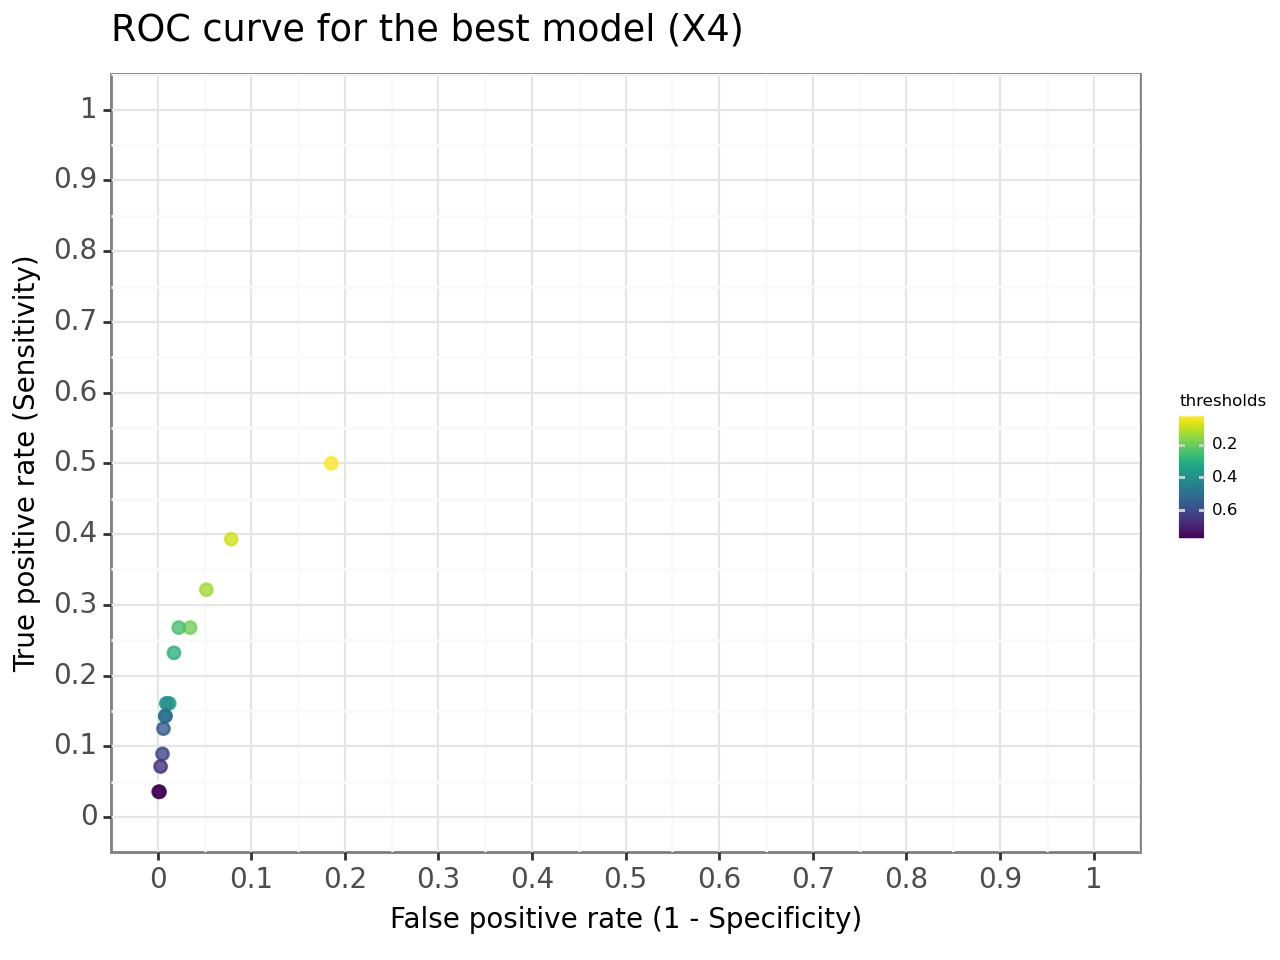

<Figure Size: (640 x 480)>

In [161]:
ggplot(tpr_fpr_for_thresholds, aes(x = 'false_positive_rates', y = 'true_positive_rates', color='thresholds'))\
        + labs(
            x = "False positive rate (1 - Specificity)", 
            y = "True positive rate (Sensitivity)",
            title = 'ROC curve for the best model (X4)'
        )\
        + geom_point(size=2, alpha=0.8) + scale_color_continuous(trans = 'reverse')\
        + scale_x_continuous(limits=(0,1), breaks = seq(0, 1.01, by = 0.1))\
        + scale_y_continuous(limits=(0,1), breaks = seq(0, 1.01, by = 0.1))\
        + theme_bw()\
        +theme(legend_position="right",
            axis_text=element_text(size=10),
            axis_title=element_text(size=10),
            legend_text = element_text(size = 6),
            legend_title = element_text(size = 6),
            legend_key_size=6)

In [162]:
%matplotlib inline

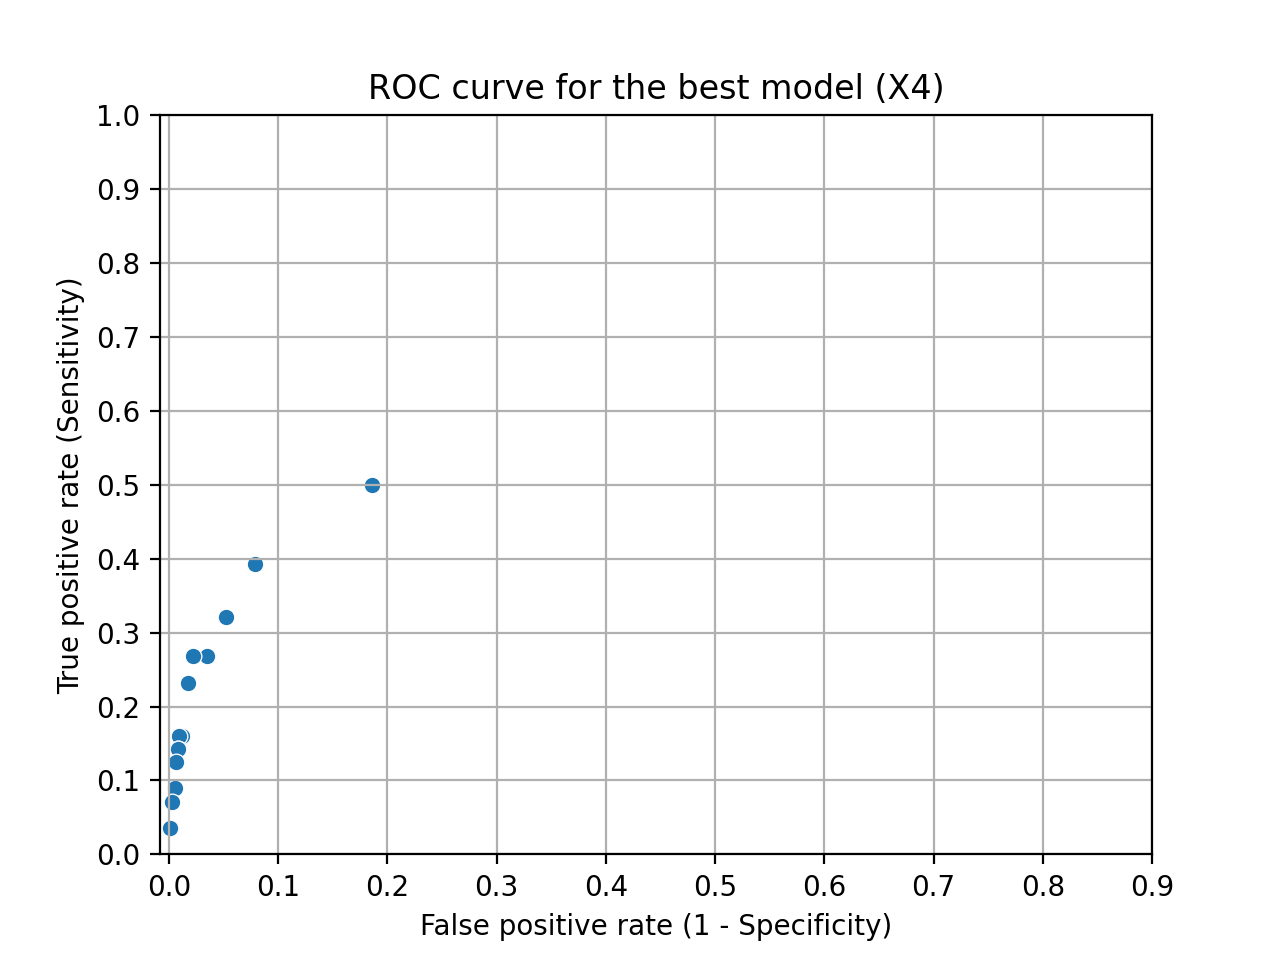

In [163]:
ax = sns.scatterplot(
    data = tpr_fpr_for_thresholds,
    x = 'false_positive_rates', 
    y = 'true_positive_rates', 
    marker = 'o')
ax.set_title('ROC curve for the best model (X4)')
ax.set_xlabel("False positive rate (1 - Specificity)"), 
ax.set_ylabel("True positive rate (Sensitivity)")
ax.set_xticks([x/10 for x in range(0,10,1)])
ax.set_yticks([x/10 for x in range(0,11,1)])
ax.grid(True);

**continuous ROC on holdout with best model (Logit 4)**

*ggplot*

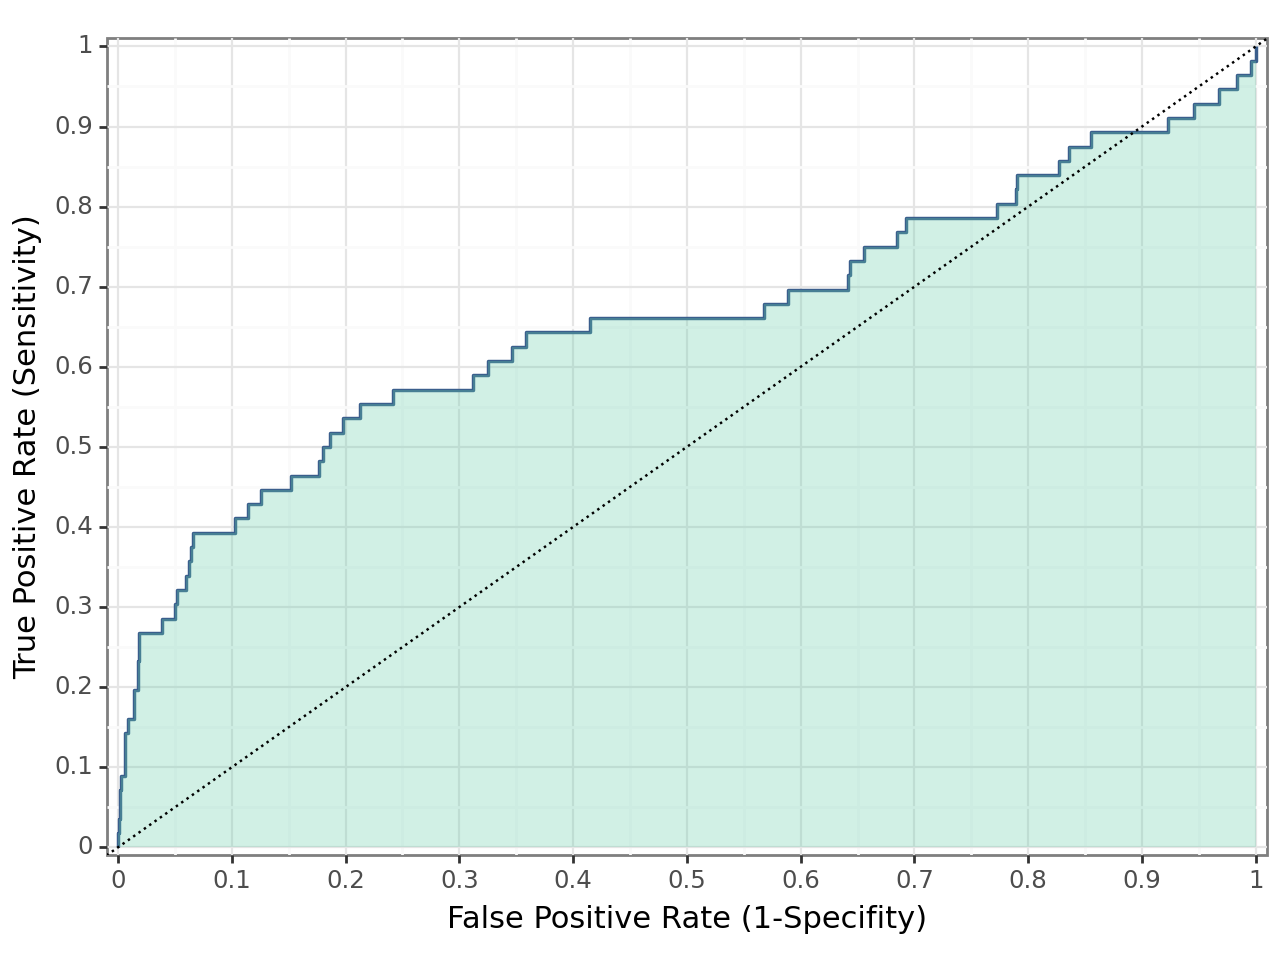

<Figure Size: (640 x 480)>

In [164]:
create_roc_plot(y_holdout, logit_predicted_probabilities_holdout)

**Confusion table with different tresholds**

default: the threshold 0.5 is used to convert probabilities to binary classes

In [165]:
logit_class_prediction = best_model.predict(best_model_X_holdout)

values, counts = np.unique(logit_class_prediction.tolist(), return_counts=True)
print(values[0],' (no default): ',counts[0])
print(values[1],' (default): ',counts[1])

0  (no default):  1021
1  (default):  16


confusion matrix: summarize different type of errors and successfully predicted cases   
positive = "yes": explicitly specify the positive case

In [166]:
cm_object1 = confusion_matrix(y_holdout, logit_class_prediction, labels=[0,1])
cm1 = pd.DataFrame(cm_object1, 
    index=['Actual no default', 'Actual default'], 
    columns=['Predicted no default', 'Predicted default'])
cm1

,Predicted no default,Predicted default
Actual no default,973,8
Actual default,48,8


Applying different thresholds

- 0.5 same as before

In [167]:
holdout_prediction = np.where(logit_predicted_probabilities_holdout < 0.5, 0, 1)
cm_object1b = confusion_matrix(y_holdout, holdout_prediction, labels=[0,1])
cm1b = pd.DataFrame(cm_object1b, 
    index=['Actual no default', 'Actual default'], 
    columns=['Predicted no default', 'Predicted default'])
cm1b

,Predicted no default,Predicted default
Actual no default,973,8
Actual default,48,8


In [168]:
print(f'FPR: {round(cm1b.iloc[0,1] / cm1b.iloc[0].sum(), 3)}')

FPR: 0.008


In [169]:
mean_predicted_default_prob = np.mean(logit_predicted_probabilities_holdout)
round(mean_predicted_default_prob, 3)

0.047

In [170]:
holdout_prediction = np.where(logit_predicted_probabilities_holdout < mean_predicted_default_prob, 0, 1)
cm_object2 = confusion_matrix(y_holdout, holdout_prediction, labels=[0,1])
cm2 = pd.DataFrame(cm_object2, 
    index=['Actul no defaul', 'Actual default'], 
    columns=['Predicted no default', 'Predicted default'])
cm2

,Predicted no default,Predicted default
Actul no defaul,781,200
Actual default,26,30


In [171]:
print(f'FPR: {round(cm2.iloc[0,1] / cm2.iloc[0].sum(), 3)}')

FPR: 0.204


#### Calibration curve

How well do estimated vs actual event probabilities relate to each other?

In [172]:
# holdout.reset_index(drop = True, inplace = True)

In [173]:
""" holdout = pd.concat([best_model_X_holdout, y_holdout], axis=1)
holdout["best_logit_no_loss_pred"] = logit_predicted_probabilities_holdout
create_calibration_plot(
    holdout, 
    # file_name = "ch17-figure-1-logit-m4-calibration",
    prob_var='best_logit_no_loss_pred', 
    actual_var='default',
    y_lab="Actual event probability", 
    n_bins=10, 
    breaks=None)"""

' holdout = pd.concat([best_model_X_holdout, y_holdout], axis=1)\nholdout["best_logit_no_loss_pred"] = logit_predicted_probabilities_holdout\ncreate_calibration_plot(\n    holdout, \n    # file_name = "ch17-figure-1-logit-m4-calibration",\n    prob_var=\'best_logit_no_loss_pred\', \n    actual_var=\'default\',\n    y_lab="Actual event probability", \n    n_bins=10, \n    breaks=None)'

### AUC using a loss function

**Loss function**: relative cost of of a false negative classification (as compared with a false positive classification)

In [174]:
FP = 3
FN = 15
cost = FN/FP

# the prevalence, or the proportion of cases in the population (n.cases/(n.controls+n.cases))
prevelance = y_train.sum()/len(y_train)
prevelance

0.06564748201438848

**Draw ROC Curve and find optimal threshold with loss function**

The optimal cut-off is the threshold that maximizes the distance to the identity (diagonal) line

In [175]:
best_thresholds_cv = dict()
expected_loss_cv = dict()
fold5_threshold = dict()
fold5_expected_loss = dict()
fold5_all_coords = dict()

for i, model_name in enumerate(logit_models):
    best_thresholds = []
    expected_loss =[]
    if model_name != 'LASSO':
        X = logit_model_vars[i]
        c_index = 0
    else:
        X = normalized_logitvars
        c_index = best_lambda_i
    fold = 0
    for train_index, test_index in k.split(X):
        X_fold = X.iloc[test_index,:]
        y_fold = y_train.iloc[test_index]
        pred_fold = generate_fold_prediction(logit_models[model_name], X_fold, fold, c_index)
        false_pos_rate, true_pos_rate, thresholds = roc_curve(y_fold, pred_fold)
        optimal_threshold = sorted(list(zip(
            np.abs(true_pos_rate + (1 - prevelance)/(cost * prevelance)*(1-false_pos_rate)),\
                                       thresholds)), key=lambda i: i[0], reverse=True)[0][1]
        best_thresholds.append(optimal_threshold)
        threshold_prediction = np.where(pred_fold < optimal_threshold, 0, 1)
        tn, fp, fn, tp = confusion_matrix(y_fold, threshold_prediction, labels=[0,1]).ravel()
        curr_exp_loss = (fp*FP + fn*FN)/len(y_fold)
        expected_loss.append(curr_exp_loss)
        fold = fold+1

    best_thresholds_cv[model_name] = np.mean(best_thresholds)
    expected_loss_cv[model_name] = np.mean(expected_loss)

    # for fold #5
    fold5_threshold[model_name] = optimal_threshold
    fold5_expected_loss[model_name] = curr_exp_loss

    all_coords = pd.DataFrame({
        'false_pos': false_pos_rate*sum(y_fold == 0),
        'true_pos': true_pos_rate*sum(y_fold == 1),
        'false_neg': sum(y_fold == 1) - true_pos_rate*sum(y_fold == 1),
        'true_neg': sum(y_fold == 0) - false_pos_rate*sum(y_fold == 0),
        'pos': sum(y_fold == 1),
        'neg': sum(y_fold == 0),
        'n': len(y_fold),
        'thresholds': thresholds
    })
    
    fold5_all_coords[model_name] = all_coords

In [176]:
fold5_all_coords['X1']

,false_pos,true_pos,false_neg,true_neg,pos,neg,n,thresholds
0,0.0,0.0,14.0,208.0,14,208,222,inf
1,0.0,1.0,13.0,208.0,14,208,222,0.843451
2,0.0,2.0,12.0,208.0,14,208,222,0.822248
3,4.0,2.0,12.0,204.0,14,208,222,0.539104
4,4.0,3.0,11.0,204.0,14,208,222,0.447812
5,9.0,3.0,11.0,199.0,14,208,222,0.229151
6,9.0,4.0,10.0,199.0,14,208,222,0.219997
7,11.0,4.0,10.0,197.0,14,208,222,0.185462
8,11.0,6.0,8.0,197.0,14,208,222,0.128659
9,15.0,6.0,8.0,193.0,14,208,222,0.110382


In [177]:
logit_summary2 = pd.DataFrame(best_thresholds_cv.items(),columns=['Model', 'Avg of optimal thresholds'])
logit_summary2['Threshold for Fold5'] = fold5_threshold.values()
logit_summary2['Avg expected loss'] = expected_loss_cv.values()
logit_summary2['Expected loss for Fold5'] = fold5_expected_loss.values()

In [178]:
logit_summary2

,Model,Avg of optimal thresholds,Threshold for Fold5,Avg expected loss,Expected loss for Fold5
0,X1,0.180938,0.105750,0.706642,0.648649
1,X2,0.138547,0.086908,0.677033,0.608108
2,X3,0.198119,0.117342,0.663580,0.594595
3,X4,0.115848,0.100906,0.669095,0.621622
4,X5,0.217465,0.411193,0.687989,0.648649
5,LASSO,0.115502,0.077496,0.642068,0.513514


### Loss plot based on Fold5 in CV

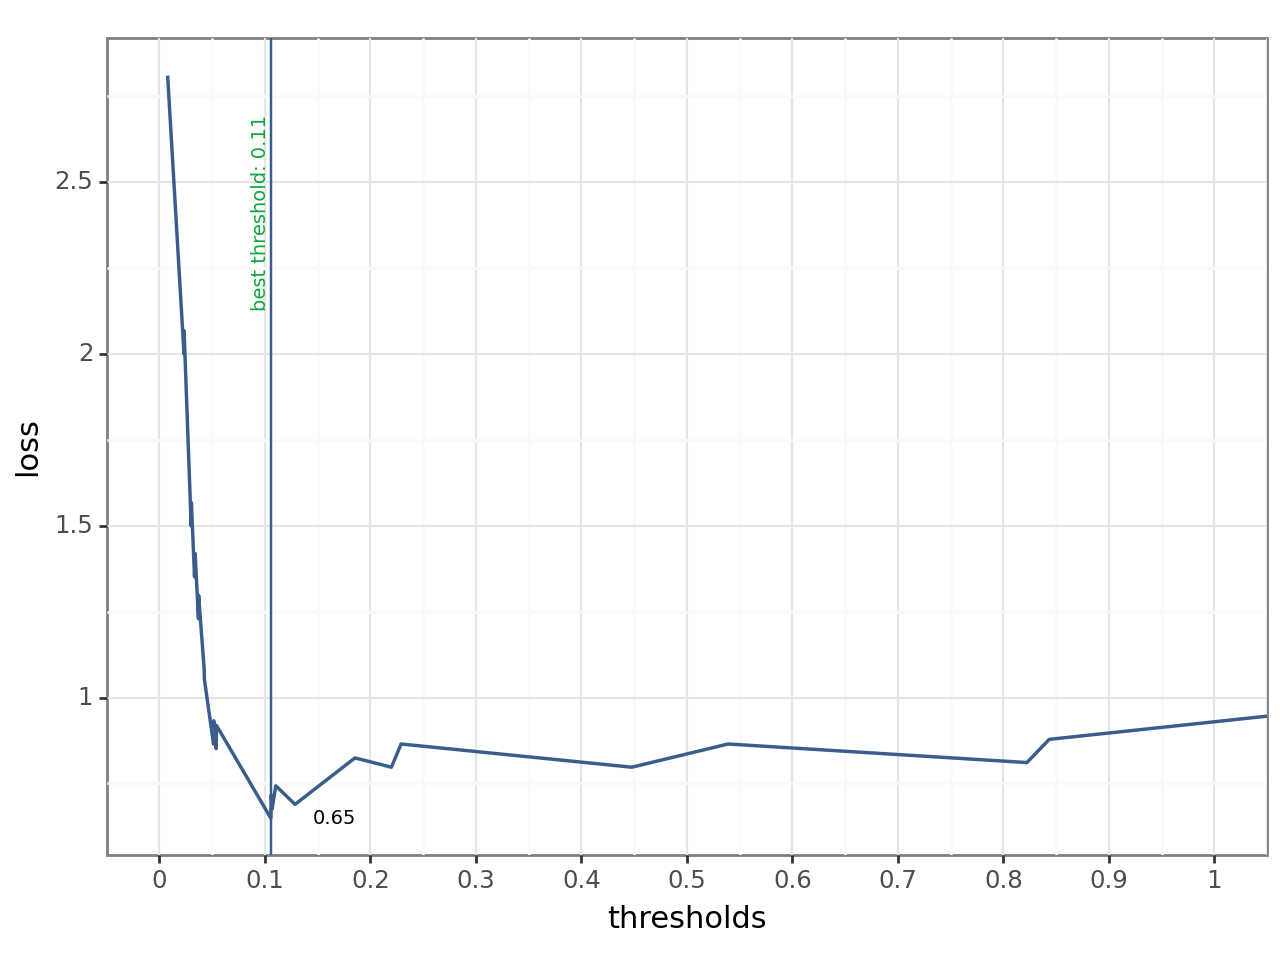

<Figure Size: (640 x 480)>

In [179]:
model_to_plot = 'X1'
create_loss_plot(
    fold5_all_coords[model_to_plot], 
    fold5_threshold[model_to_plot], 
    fold5_expected_loss[model_to_plot])

#### ROC plot plot based on Fold5 in CV

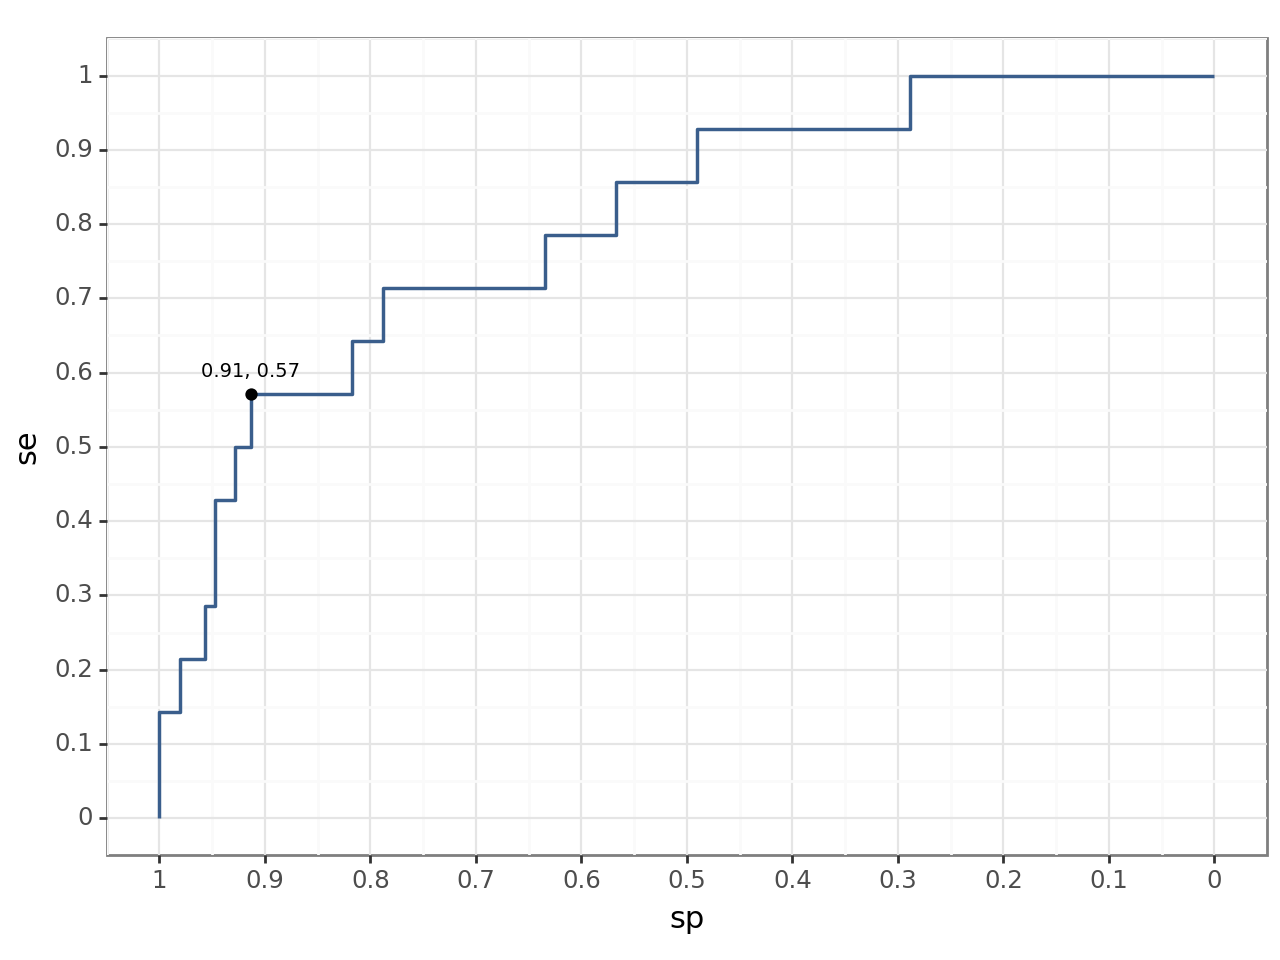

<Figure Size: (640 x 480)>

In [180]:
model_to_plot = 'X1'
create_roc_plot_with_optimal(fold5_all_coords[model_to_plot], fold5_threshold[model_to_plot])

#### Pick best model based on average expected loss

### X4

In [181]:
best_logit_optimal_treshold = best_thresholds_cv["LASSO"]
best_logit_optimal_treshold

0.11550213845240957

**Get expected loss on holdout**

In [182]:
holdout_treshold = np.where(logit_predicted_probabilities_holdout < best_logit_optimal_treshold, 0, 1)
tn, fp, fn, tp = confusion_matrix(y_holdout, holdout_treshold, labels=[0,1]).ravel()
expected_loss_holdout = (fp*FP + fn*FN)/len(y_holdout)
round(expected_loss_holdout, 3)

0.694

In [183]:
cm_object3 = confusion_matrix(y_holdout, holdout_treshold, labels=[0,1])
cm3 = pd.DataFrame(cm_object3, 
    index=['Actul no defaul', 'Actual default'], 
    columns=['Predicted no default', 'Predicted default'])
cm3.T

,Actul no defaul,Actual default
Predicted no default,916,35
Predicted default,65,21


In [184]:
print(f'FPR: {round(cm3.iloc[0,1] / cm3.iloc[0].sum(), 3)}')

FPR: 0.066


### Prediction with random forest 

In [185]:
rfvars_train = rfvars.iloc[index_train]
rfvars_holdout = rfvars.iloc[index_holdout]

In [186]:
rfvars_train.columns

Index(['sales_mil', 'd1_sales_mil_log', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets',
       'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets',
       'material_exp', 'personnel_exp', 'profit_loss_year', 'sales',
       'share_eq', 'subscribed_cap', 'female', 'ceo_age', 'flag_high_ceo_age',
       'flag_low_ceo_age', 'ceo_count', 'labor_avg_mod', 'flag_miss_labor_avg',
       'foreign_management', 'balsheet_flag', 'balsheet_length',
       'balsheet_notfullyear', 'age', 'age2', 'new', 'C(ind2_cat)[27.0]',
       'C(ind2_cat)[28.0]', 'C(ind2_cat)[29.0]', 'C(ind2_cat)[30.0]',
       'C(ind2_cat)[33.0]', 'C(ind2_cat)[55.0]', 'C(ind2_cat)[56.0]',
       'C(m_region_loc)[East]', 'C(m_region_loc)[West]', 'C(urban_m)[2.0]',
       'C(urban_m)[3.0]'],
      dtype='object')

#### Graph example

In [187]:
"""%%time 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

data_for_graph = rfvars_train[['sales_mil','profit_loss_year','foreign_management']]
rf_for_graph = DecisionTreeClassifier(
    ccp_alpha=0.0028, 
    min_samples_leaf=100, 
    max_depth=3, 
    random_state=41).fit(
    data_for_graph, 
    y_train)

plt.figure()
plt.figure(figsize=(11,11))
plot_tree(rf_for_graph, 
          feature_names = data_for_graph.columns, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          fontsize = 10)
plt.title("Decision trees")
plt.show() """

'%%time \nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.tree import plot_tree\n\ndata_for_graph = rfvars_train[[\'sales_mil\',\'profit_loss_year\',\'foreign_management\']]\nrf_for_graph = DecisionTreeClassifier(\n    ccp_alpha=0.0028, \n    min_samples_leaf=100, \n    max_depth=3, \n    random_state=41).fit(\n    data_for_graph, \n    y_train)\n\nplt.figure()\nplt.figure(figsize=(11,11))\nplot_tree(rf_for_graph, \n          feature_names = data_for_graph.columns, \n          filled=True, \n          rounded=True, \n          proportion=True, \n          fontsize = 10)\nplt.title("Decision trees")\nplt.show() '

### Probability forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap = True` (default), otherwise the whole dataset is used to build each tree.
- `max_features`: number of features to consider when looking for the best split
- `min_samples_fit`: the minimum number of samples required`to split an internal node

In [188]:
grid = {'max_features': [5, 6, 7, 8],
        'criterion':['gini'],
        'min_samples_split': [9, 11, 16]}

In [189]:
elements = len(grid['max_features'])*len(grid['min_samples_split'])
elements

12

In [190]:
prob_forest = RandomForestClassifier(
    random_state=20240205, 
    n_estimators=500, 
    oob_score=True)

prob_forest_grid = GridSearchCV(
    prob_forest, 
    grid, 
    cv=k, 
    refit='accuracy',
    scoring = ['accuracy', 'roc_auc', 'neg_brier_score'], 
    n_jobs=-1)

In [191]:
%%time
prob_forest_fit = prob_forest_grid.fit(rfvars_train, y_train)

CPU times: total: 1.33 s
Wall time: 16.2 s


**CV summary table**

In [192]:
prob_forest_fit.cv_results_

{'mean_fit_time': array([3.41378174, 4.58067617, 2.84747505, 4.70346556, 3.0003624 ,
        3.38826494, 1.85120778, 3.3687295 , 3.35597382, 2.54807429,
        2.9200305 , 2.71989841]),
 'std_fit_time': array([1.56250466, 3.06212538, 1.40841307, 2.13754042, 3.0332462 ,
        2.12935262, 0.48587426, 1.47059615, 1.80406733, 1.07565917,
        0.90911343, 0.57969278]),
 'mean_score_time': array([0.39547644, 0.18916755, 0.14830346, 0.21029634, 0.10863609,
        0.21189027, 0.12239003, 0.1993329 , 0.16066065, 0.12597852,
        0.1534863 , 0.08411913]),
 'std_score_time': array([0.25827011, 0.14276355, 0.10229756, 0.12742538, 0.01758151,
        0.11806596, 0.04476105, 0.07627921, 0.115852  , 0.07674855,
        0.07696714, 0.03992013]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False, False, False, False,
                  

Our grid has 3x2=6 elements. ????

In [193]:
cv_accuracy = np.zeros([elements]) # change 
for i in range(5):
    cv_accuracy = cv_accuracy + prob_forest_fit.cv_results_['split' + str(i) + '_test_accuracy']
cv_accuracy = cv_accuracy/5
cv_accuracy

array([0.93435139, 0.93615319, 0.93435139, 0.93345049, 0.93345049,
       0.93345453, 0.93345049, 0.93345453, 0.93345049, 0.93075587,
       0.93255363, 0.93255363])

In [194]:
prob_forest_fit.best_score_

0.9361531935522966

In [195]:
cv_auc = np.zeros([elements])
for i in range(5):
    cv_auc = cv_auc + prob_forest_fit.cv_results_['split' + str(i) + '_test_roc_auc']
cv_auc = cv_auc/5
cv_auc

array([0.83124975, 0.82935321, 0.82527912, 0.8247328 , 0.82553238,
       0.82786703, 0.82443025, 0.82966447, 0.82387679, 0.82686572,
       0.82645384, 0.82178817])

In [196]:
cv_rmse = np.zeros([elements])
for i in range(5):
    cv_rmse = cv_rmse +np.sqrt(-1*(prob_forest_fit.cv_results_['split' + str(i) + '_test_neg_brier_score'])).tolist()
cv_rmse = cv_rmse/5
cv_rmse

array([0.22797942, 0.22884343, 0.22865045, 0.22926152, 0.22900411,
       0.22950765, 0.22965307, 0.22914683, 0.22944147, 0.22987592,
       0.22966444, 0.22994738])

In [197]:
prob_forest_cv_results = pd.DataFrame({
    'max_features': prob_forest_fit.cv_results_['param_max_features'],
    'min_samples_split': prob_forest_fit.cv_results_['param_min_samples_split'],
    'cv_accuracy': cv_accuracy,
    'cv_auc': cv_auc,
    'cv_rmse': cv_rmse
})

In [198]:
prob_forest_cv_results

,max_features,min_samples_split,cv_accuracy,cv_auc,cv_rmse
0,5,9,0.934351,0.831250,0.227979
1,5,11,0.936153,0.829353,0.228843
2,5,16,0.934351,0.825279,0.228650
3,6,9,0.933450,0.824733,0.229262
4,6,11,0.933450,0.825532,0.229004
5,6,16,0.933455,0.827867,0.229508
6,7,9,0.933450,0.824430,0.229653
7,7,11,0.933455,0.829664,0.229147
8,7,16,0.933450,0.823877,0.229441
9,8,9,0.930756,0.826866,0.229876


**Optimal parameter values**

In [199]:
best_max_features = prob_forest_fit.best_params_['max_features']
best_min_sample_split = prob_forest_fit.best_params_['min_samples_split']
prob_forest_fit.best_params_

{'criterion': 'gini', 'max_features': 5, 'min_samples_split': 11}

**Average RMSE and AUC over folds**

In [200]:
prob_forest_best_results = prob_forest_cv_results[
    (prob_forest_cv_results.max_features == best_max_features) & 
    (prob_forest_cv_results.min_samples_split == best_min_sample_split)]
prob_forest_best_results_index = prob_forest_best_results.index.values[0]

CV_RMSE['rf_p'] = prob_forest_best_results.cv_rmse.values[0]
CV_AUC['rf_p'] = prob_forest_best_results.cv_auc.values[0]

In [201]:
CV_RMSE

{'X1': 0.23137036015959728,
 'X2': 0.23208382651606474,
 'X3': 0.2310211565082286,
 'X4': 0.2328573009254656,
 'X5': 0.23471265968543492,
 'LASSO': 0.2282050375379585,
 'rf_p': 0.2288434335966786}

In [202]:
CV_AUC

{'X1': 0.7853725512135123,
 'X2': 0.7815227758934853,
 'X3': 0.8090888748297214,
 'X4': 0.7741726630857066,
 'X5': 0.7794221241932913,
 'LASSO': 0.8028564630767148,
 'rf_p': 0.8293532124710614}

**Get fold level RMSE and AUC**

In [203]:
CV_RMSE_folds_rf_p = list()

for i in range(5):
    rmse = np.sqrt(-1*(prob_forest_fit.cv_results_['split' + str(i) + '_test_neg_brier_score'])).tolist()[prob_forest_best_results_index]
    CV_RMSE_folds_rf_p.append(rmse)

CV_RMSE_folds['rf_p'] = CV_RMSE_folds_rf_p

CV_AUC_folds_rf_p = list()

for i in range(5):
    rmse = prob_forest_fit.cv_results_['split' + str(i) + '_test_roc_auc'][prob_forest_best_results_index]
    CV_AUC_folds_rf_p.append(rmse)

CV_AUC_folds['rf_p'] = CV_AUC_folds_rf_p

In [204]:
pd.DataFrame(CV_AUC_folds)

,X1,X2,X3,X4,X5,LASSO,rf_p
0,0.703526,0.678846,0.752244,0.717628,0.708654,0.733013,0.755769
1,0.806461,0.812198,0.845411,0.848128,0.860507,0.885568,0.908816
2,0.854428,0.843800,0.845411,0.807729,0.810950,0.797101,0.887601
3,0.758189,0.743099,0.754509,0.699301,0.694884,0.749356,0.755981
4,0.804258,0.829670,0.847871,0.798077,0.822115,0.849245,0.838599


**Now use loss function and search for best thresholds and expected loss over folds**

In [205]:
best_thresholds = list()
expected_loss = list()

fold = 0
for train_index, test_index in k.split(rfvars_train):
    X_fold = rfvars_train.iloc[test_index,:]
    y_fold = y_train.iloc[test_index]
    
    X_fold_train = rfvars_train.iloc[train_index,:]
    y_fold_train = y_train.iloc[train_index]
    
    prob_forest_best = RandomForestClassifier(
        random_state=20240205, 
        n_estimators=500, 
        oob_score=True,
        criterion = 'gini', 
        max_features = best_max_features, min_samples_split = best_min_sample_split)
    
    prob_forest_best_fold = prob_forest_best.fit(X_fold_train, y_fold_train)
    pred_fold = prob_forest_best_fold.predict_proba(X_fold)[:,1]

    false_pos_rate, true_pos_rate, threshold = roc_curve(y_fold, pred_fold)
    
    best_threshold = sorted(
        list(
            zip(
                np.abs(
                    true_pos_rate + (1 - prevelance)/(cost * prevelance)*(1-false_pos_rate)
                ),
                threshold
            )
        ), 
        key=lambda x: x[0], reverse=True)[0][1]
    
    best_thresholds.append(best_threshold)
    
    threshold_prediction = np.where(pred_fold < best_threshold, 0, 1)
    tn, fp, fn, tp = confusion_matrix(y_fold, threshold_prediction, labels=[0,1]).ravel()
    curr_exp_loss = (fp*FP + fn*FN)/len(y_fold)
    expected_loss.append(curr_exp_loss)

In [206]:
best_thresholds

[0.1814234174378441,
 0.28172201502487865,
 0.25250819812282677,
 0.1346591032286988,
 0.12921232618131945]

In [207]:
expected_loss

[0.8475336322869955,
 0.5246636771300448,
 0.5675675675675675,
 0.6756756756756757,
 0.581081081081081]

In [208]:
fold5_threshold_rf = best_threshold
fold5_expected_loss_rf = curr_exp_loss

all_coords_rf = pd.DataFrame({
    'false_pos': false_pos_rate*sum(y_fold == 0),
    'true_pos': true_pos_rate*sum(y_fold == 1),
    'false_neg': sum(y_fold == 1) - true_pos_rate*sum(y_fold == 1),
    'true_neg': sum(y_fold == 0) - false_pos_rate*sum(y_fold == 0),
    'pos': sum(y_fold == 1),
    'neg': sum(y_fold == 0),
    'n': len(y_fold),
    'thresholds': threshold
})

all_coords_rf

,false_pos,true_pos,false_neg,true_neg,pos,neg,n,thresholds
0,0.0,0.0,14.0,208.0,14,208,222,inf
1,1.0,0.0,14.0,207.0,14,208,222,0.496958
2,2.0,0.0,14.0,206.0,14,208,222,0.466407
3,2.0,1.0,13.0,206.0,14,208,222,0.447979
4,3.0,1.0,13.0,205.0,14,208,222,0.436702
5,3.0,3.0,11.0,205.0,14,208,222,0.400059
6,6.0,3.0,11.0,202.0,14,208,222,0.353527
7,6.0,5.0,9.0,202.0,14,208,222,0.323657
8,11.0,5.0,9.0,197.0,14,208,222,0.258769
9,11.0,6.0,8.0,197.0,14,208,222,0.243782


In [209]:
fold5_threshold_rf = best_threshold
fold5_expected_loss_rf = curr_exp_loss

all_coords_rf = pd.DataFrame({
    'false_pos': false_pos_rate*sum(y_fold == 0),
    'true_pos': true_pos_rate*sum(y_fold == 1),
    'false_neg': sum(y_fold == 1) - true_pos_rate*sum(y_fold == 1),
    'true_neg': sum(y_fold == 0) - false_pos_rate*sum(y_fold == 0),
    'pos': sum(y_fold == 1),
    'neg': sum(y_fold == 0),
    'n': len(y_fold),
    'thresholds': threshold
})

In [210]:
expected_loss_cv['rf_p'] = np.mean(expected_loss)
best_thresholds_cv['rf_p'] = np.mean(best_thresholds)

In [211]:
rf_summary = pd.DataFrame(
    {'CV RMSE': [round(CV_RMSE['rf_p'], 3)],
     'CV AUC': [round(CV_AUC['rf_p'], 3)],
     'Avg of optimal thresholds': [round(best_thresholds_cv['rf_p'], 3)],
     'Threshold for Fold5': [round(best_threshold, 3)],
     'Avg expected loss': [round(expected_loss_cv['rf_p'], 3)],
     'Expected loss for Fold5': [round(curr_exp_loss, 3)]})

rf_summary

,CV RMSE,CV AUC,Avg of optimal thresholds,Threshold for Fold5,Avg expected loss,Expected loss for Fold5
0,0.229,0.829,0.196,0.129,0.639,0.581


**Plots based on Fold5 in CV**

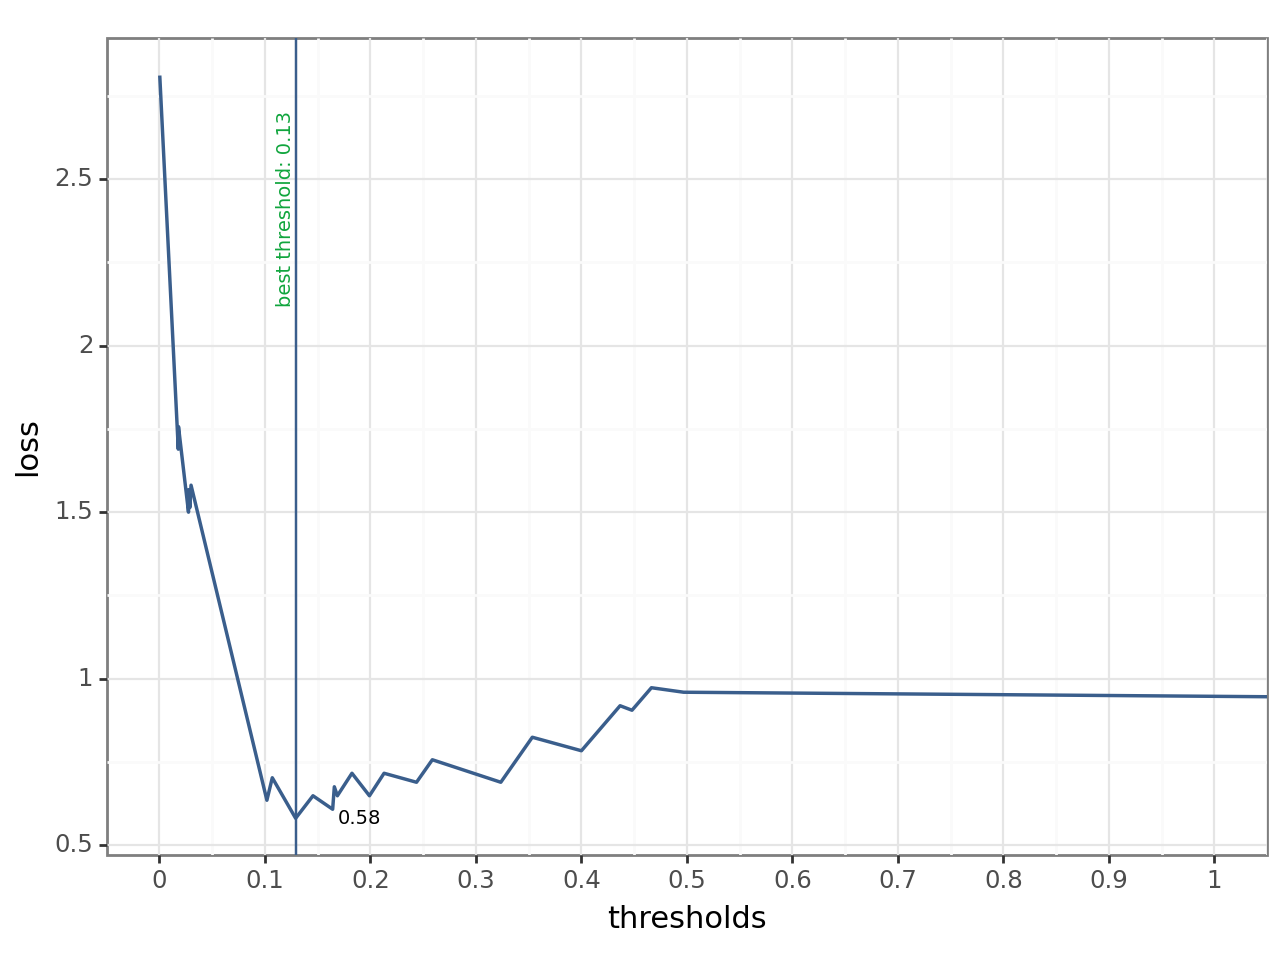

<Figure Size: (640 x 480)>

In [212]:
create_loss_plot(all_coords_rf, fold5_threshold_rf, fold5_expected_loss_rf)

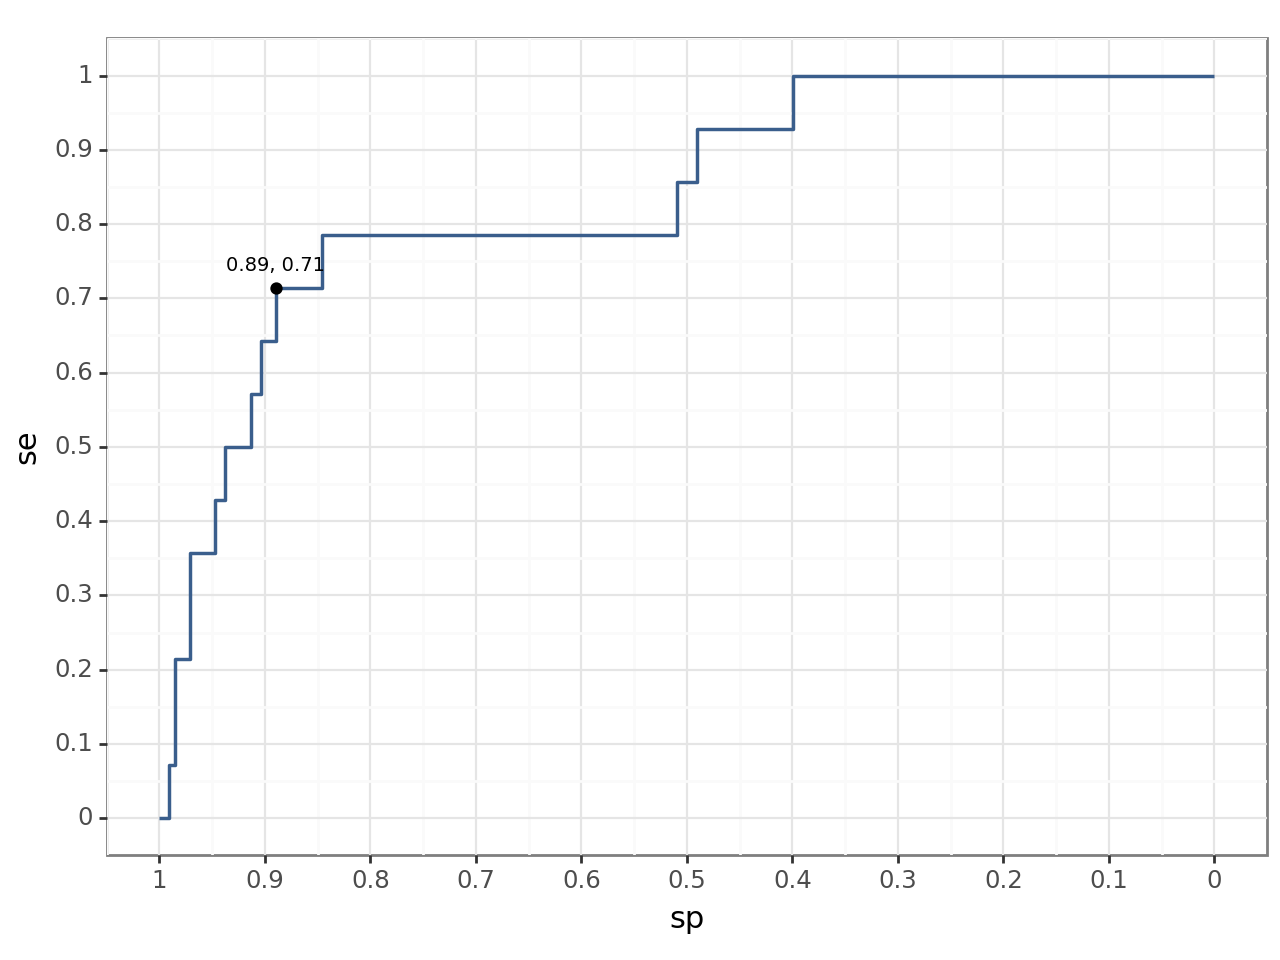

<Figure Size: (640 x 480)>

In [213]:
create_roc_plot_with_optimal(all_coords_rf, fold5_threshold_rf)

**Take model to holdout and estimate RMSE, AUC and expected loss**

In [214]:
prob_forest_fit_best = prob_forest_fit.best_estimator_
rf_predicted_probabilities_holdout = prob_forest_fit_best.predict_proba(rfvars_holdout)[:,1]
rmse_rf = np.sqrt(mean_squared_error(y_holdout, rf_predicted_probabilities_holdout))
round(rmse_rf, 3)

0.209

**ROC AUC  on holdout**

In [215]:
auc_rf = roc_auc_score(y_holdout, rf_predicted_probabilities_holdout)
round(auc_rf, 3)

0.802

**Expected loss on holdout**

In [216]:
holdout_treshold = np.where(rf_predicted_probabilities_holdout < best_thresholds_cv['rf_p'], 0, 1)
tn, fp, fn, tp = confusion_matrix(y_holdout, holdout_treshold, labels=[0,1]).ravel()
expected_loss_holdout = (fp*FP + fn*FN)/len(y_holdout)
round(expected_loss_holdout, 3)

0.634

In [217]:
import datetime
print(datetime.datetime.now())
###why? :DDDDD

2024-02-29 12:54:24.448296


### Getting probalbilities and classifications from RandomforestClassifier

- classes

In [218]:
prob_forest_best_fold.predict(rfvars_holdout)

array([0, 0, 0, ..., 0, 0, 0])

- probabilities

In [219]:
prob_forest_best_fold.predict_proba(rfvars_holdout)

array([[0.99668054, 0.00331946],
       [0.99342446, 0.00657554],
       [0.71471364, 0.28528636],
       ...,
       [0.99518235, 0.00481765],
       [0.98939392, 0.01060608],
       [0.96411334, 0.03588666]])

## Final results

In [220]:
nvars['rf_p'] = len(rfvars.columns)

In [221]:
summary_results = pd.DataFrame({"Model": list(nvars.keys()),
                              "Number of predictors": list(nvars.values()),
                              "CV RMSE": list(CV_RMSE.values()),
                              "CV AUC": list(CV_AUC.values()),
                              "CV threshold": list(best_thresholds_cv.values()),
                              "CV expected Loss": list(expected_loss_cv.values())
                               })

In [222]:
summary_results

,Model,Number of predictors,CV RMSE,CV AUC,CV threshold,CV expected Loss
0,X1,11,0.231370,0.785373,0.180938,0.706642
1,X2,16,0.232084,0.781523,0.138547,0.677033
2,X3,44,0.231021,0.809089,0.198119,0.663580
3,X4,79,0.232857,0.774173,0.115848,0.669095
4,X5,171,0.234713,0.779422,0.217465,0.687989
5,LASSO,19,0.228205,0.802856,0.115502,0.642068
6,rf_p,43,0.228843,0.829353,0.195905,0.639304


## Teendők
- Mi van az NaN értékekkel, most mindent dropolunk
- Training kiválasztás próbák - csak industry, csak egy év (több verzió 2013 / 2014), teljes panel data - valszeg random forest túl hosszú
- random forest mélységeket tesztelni
- cross panelnél, yeart berakni variable-nek
- az assignmentben kitűzött reportolni való dolgokat kigyűjteni a zértékeléshez